# 1. Importing the libraries

In [1]:
import pylab as pl # linear algebra + plots
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import gc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from multiprocessing import Pool
from textblob import TextBlob
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.sparse import hstack
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# 2. Reading the data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
resource = pd.read_csv('resources.csv')

/Users/arshiya/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3. Glimpse of data

In [3]:
train_data.shape

(182080, 16)

In [4]:
test_data.shape

(78035, 15)

In [5]:
train_data.head()


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [6]:
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,My class is made up of 12 boys and 12 girls. ...,My second grade class will really benefit from...,The genorous donations to my project will make...,My students need a drying rack for their art p...,2
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,My students are all very talented young indivi...,"We do a lot of small group, where the student ...",This project is very important to my classroom...,My students need Time Magazines for next year ...,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,My class consists of 14 energetic learners. O...,These Fairy Tale Problem Solving STEM kits wil...,These materials will be help my students with ...,My students need to be mentally stimulated to ...,0
3,p233680,8e92622d2985d3faac1de71609c4be72,Mrs.,IA,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,First graders enter the classroom each day rea...,Book bins will help to organize our classroom ...,"When students begin the first grade, many are ...",My students need an organized classroom library.,0
4,p171879,91a3c89981f626d9a0d067c65fb186ce,Mr.,CA,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",We have a diverse population with almost entir...,Each day in my class students consume supplies...,My students come from very troubled homes and ...,My students need reeds to perform in class eac...,1


In [7]:
resource.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


# 4. Data exploration

## 4.1 Project Approval Ratio

In [8]:
train_data['approved'] = train_data['project_is_approved'].apply(lambda x: x > 0)
approved= train_data['approved'].value_counts()[1]
rejected= train_data['approved'].value_counts()[0]
print(approved)
print(rejected)
total_projects = approved + rejected
ratio_approved = approved / total_projects
ratio_approved

154346
27734


0.84768233743409493

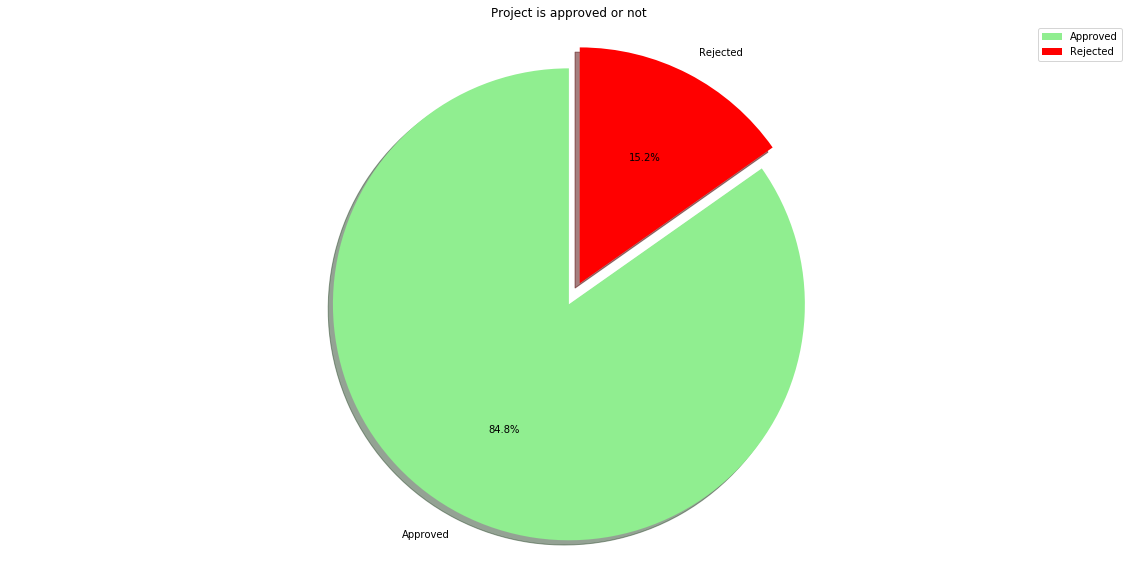

In [9]:
labels = 'Approved', 'Rejected'
sizes = [approved, rejected]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['lightgreen', 'red']


fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, explode=explode, labels=labels, colors= colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(labels)
plt.title('Project is approved or not')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Majority of the projects are approved

## 4.2 Statewise analysis

### Project approved per state

In [10]:
grant_per_state = train_data.groupby(["school_state","approved"]).size().unstack()
grant_per_state[2] = grant_per_state[0] + grant_per_state[1]
grant_per_state[3] = grant_per_state[1]/grant_per_state[2]
print(grant_per_state)

approved      False   True      2         3
school_state                               
AK               84    473    557  0.849192
AL              448   2507   2955  0.848393
AR              295   1462   1757  0.832100
AZ              572   3042   3614  0.841727
CA             3689  22006  25695  0.856431
CO              291   1596   1887  0.845787
CT              356   2410   2766  0.871294
DC              169    733    902  0.812639
DE               64    525    589  0.891341
FL             1818   8541  10359  0.824500
GA             1101   5535   6636  0.834087
HI              136    733    869  0.843498
IA              166    913   1079  0.846154
ID              176    937   1113  0.841869
IL             1072   6260   7332  0.853792
IN              656   3658   4314  0.847937
KS              156    904   1060  0.852830
KY              309   1863   2172  0.857735
LA              655   3291   3946  0.834009
MA              567   3487   4054  0.860138
MD              406   2074   248

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~arshii2704/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


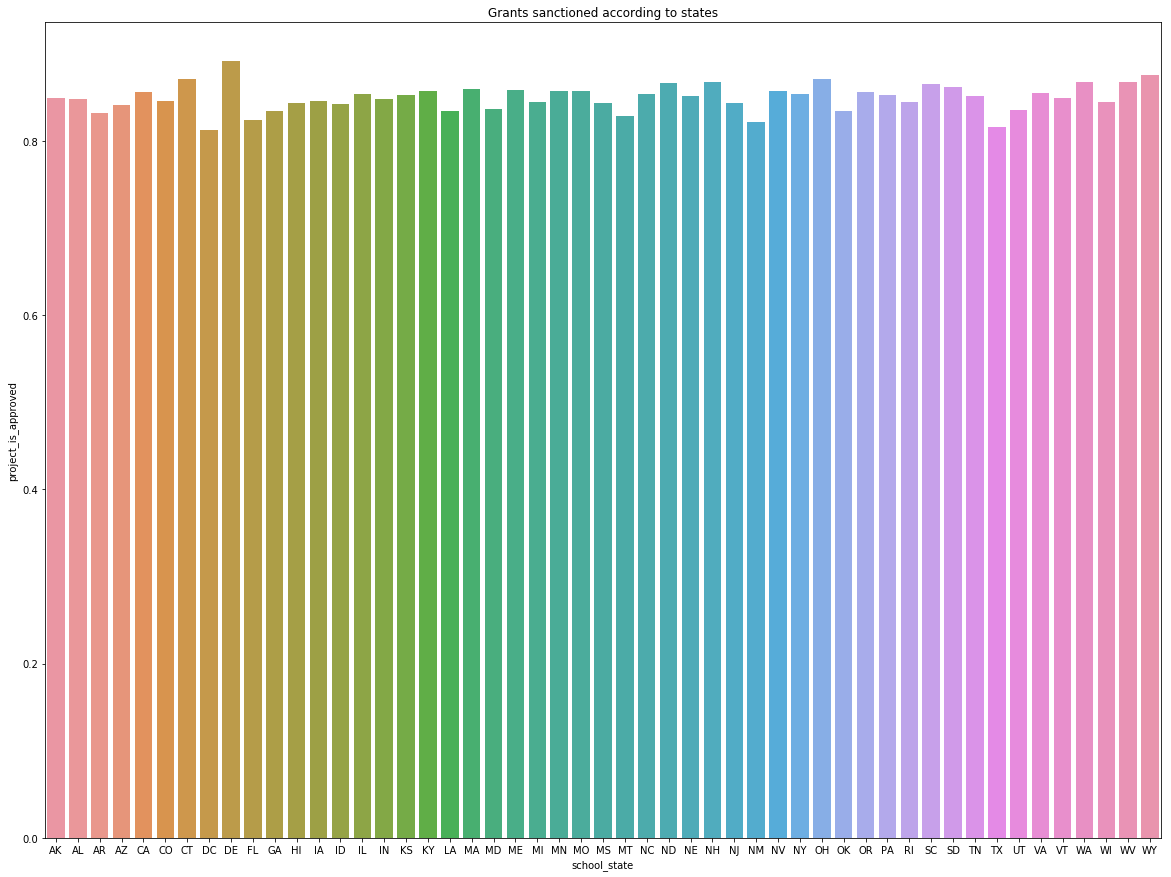

In [11]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='arshii2704', api_key='21joAi4KqS9epdGGykwE')
grant_per_state = train_data[["school_state","project_is_approved"]].groupby("school_state").mean().reset_index()
#grant_per_state1["state"] = grant_per_state.index

fig = plt.figure(figsize = (20,15))
plt.title("Grants sanctioned according to states")
sns.barplot(x= grant_per_state.school_state, y= grant_per_state.project_is_approved)

scl = [[0.0, 'rgb(240,128,128)'],[0.2, 'rgb(205,92,92)'],[0.4, 'rgb(255,127,80)'],\
            [0.6, 'rgb(255,0,0)'],[0.8, 'rgb(220,20,60)'],[1.0, 'rgb(178,34,34)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = grant_per_state['school_state'],
        z = grant_per_state['project_is_approved'].astype(float),
        locationmode = 'USA-states',
#         text = grant_per_state['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Approval rate mean")
        ) ]

layout = dict(
        title = 'Grants sanctioned according to states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Approval rate is more or less same for each state

### Submissions per state

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~arshii2704/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


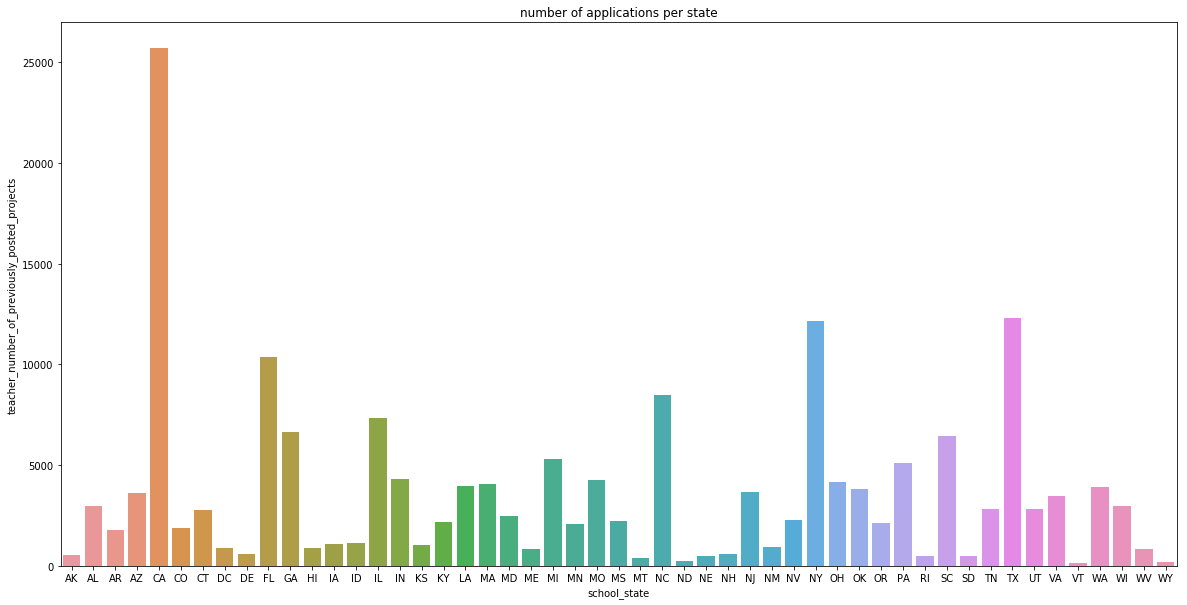

In [12]:
grant_per_state_per_number_of_essay = train_data[["school_state","teacher_number_of_previously_posted_projects"]].groupby("school_state").count().reset_index()
grant_per_state_per_number_of_essay["state"] = grant_per_state_per_number_of_essay.index

fig = plt.figure(figsize = (20,10))
plt.title("number of applications per state")
sns.barplot(x= grant_per_state_per_number_of_essay.school_state, y= grant_per_state_per_number_of_essay.teacher_number_of_previously_posted_projects)

scl = [[0.0, 'rgb(240,128,128)'],[0.2, 'rgb(205,92,92)'],[0.4, 'rgb(255,127,80)'],\
            [0.6, 'rgb(255,0,0)'],[0.8, 'rgb(220,20,60)'],[1.0, 'rgb(178,34,34)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = grant_per_state_per_number_of_essay['school_state'],
        z = grant_per_state_per_number_of_essay['teacher_number_of_previously_posted_projects'].astype(float),
        locationmode = 'USA-states',
#         text = grant_per_state['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No of submitted applications per state")
        ) ]

layout = dict(
        title = 'Applications submitted according to states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

It seems 'CA' has got highest number of submissions.

### Submission-Approval ratio per state

In [13]:
grant_per_state

,school_state,project_is_approved
0,AK,0.849192
1,AL,0.848393
2,AR,0.832100
3,AZ,0.841727
4,CA,0.856431
5,CO,0.845787
6,CT,0.871294
7,DC,0.812639
8,DE,0.891341
9,FL,0.824500


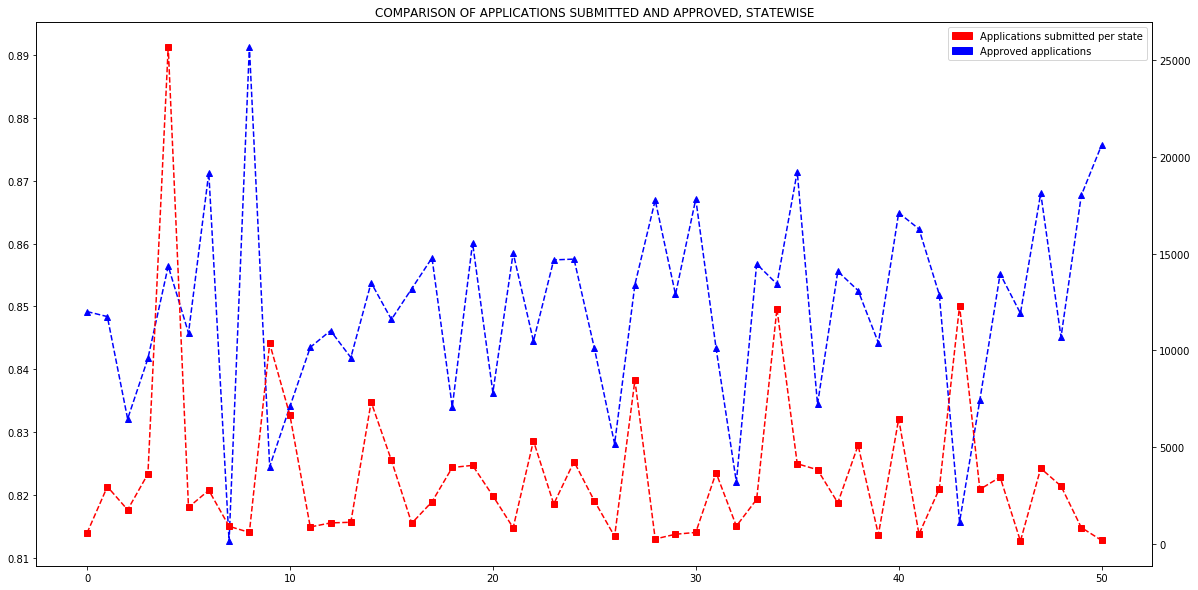

In [14]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize = (20,10))
plt.title("COMPARISON OF APPLICATIONS SUBMITTED AND APPROVED, STATEWISE")
ax1 = plt.subplot(1,1,1)
plt.plot(grant_per_state.index, grant_per_state.project_is_approved, '--b^')
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()

plt.plot(grant_per_state_per_number_of_essay.index,grant_per_state_per_number_of_essay.teacher_number_of_previously_posted_projects, '--rs')

red = mpatches.Patch(color='red', label='Applications submitted per state')
blue = mpatches.Patch(color='blue', label='Approved applications')
plt.legend(handles=[red, blue])


From the earlier graphs, it appeared as if there might be some biasness towards states, but this submission-approval ratio graph clearly states that the ratio is almost similar for all the states.

## 4.3 Previously posted projects vs Acceptance Rate

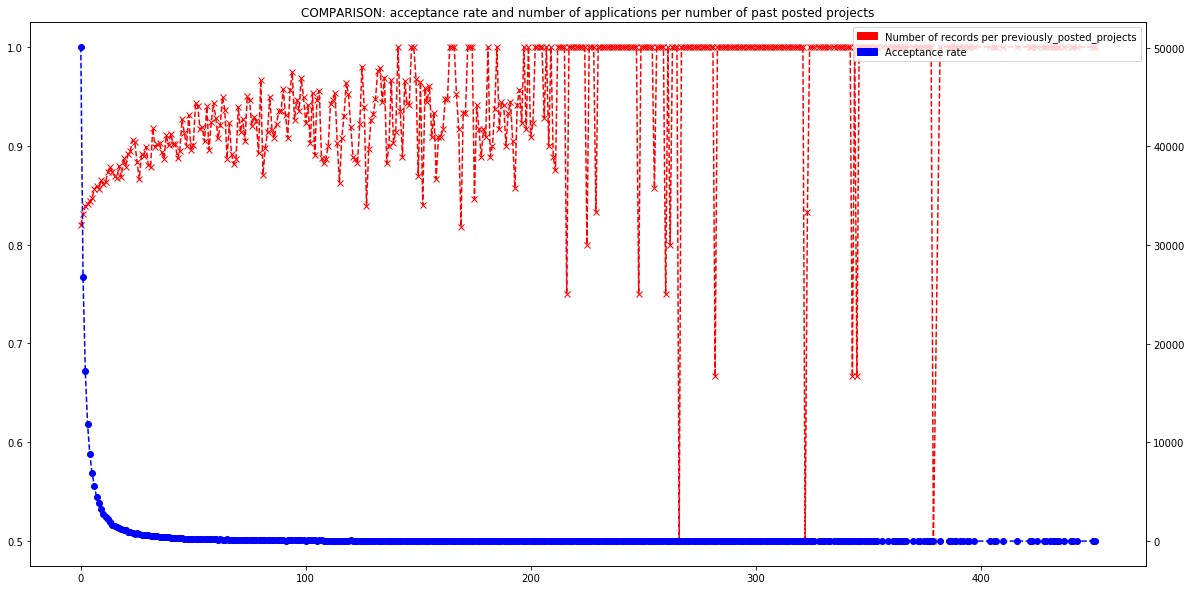

In [15]:
essay_submitted = train_data[["teacher_number_of_previously_posted_projects","project_is_approved"]].groupby("teacher_number_of_previously_posted_projects").count()
essay_submitted_mean = train_data[["teacher_number_of_previously_posted_projects","project_is_approved"]].groupby("teacher_number_of_previously_posted_projects").mean()

essay_submitted = essay_submitted.rename( columns= {"project_is_approved": "applications_approved"})
essay_submitted_mean = essay_submitted_mean.merge( essay_submitted, right_index=True, left_index= True)

essay_submitted_mean = essay_submitted_mean.sort_index( ascending= True)
essay_submitted_mean.head()


fig = plt.figure(figsize = (20,10))
plt.title("COMPARISON: acceptance rate and number of applications per number of past posted projects")

ax1 = plt.subplot(1,1,1)
plt.plot( essay_submitted_mean.index, essay_submitted_mean.project_is_approved,  '--rx') 
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()
plt.plot( essay_submitted_mean.index, essay_submitted_mean.applications_approved, '--bo' )
red_patch = mpatches.Patch(color='red', label='Number of records per previously_posted_projects')
blue_patch = mpatches.Patch(color='blue', label='Acceptance rate')
plt.legend(handles=[red_patch, blue_patch])

From this graph, it is evident that Acceptance Rate is constant after a certain point, and so Previously posted projects do not have much influence on the decision.

## 4.4 Category Based Analysis

### Project approved per category

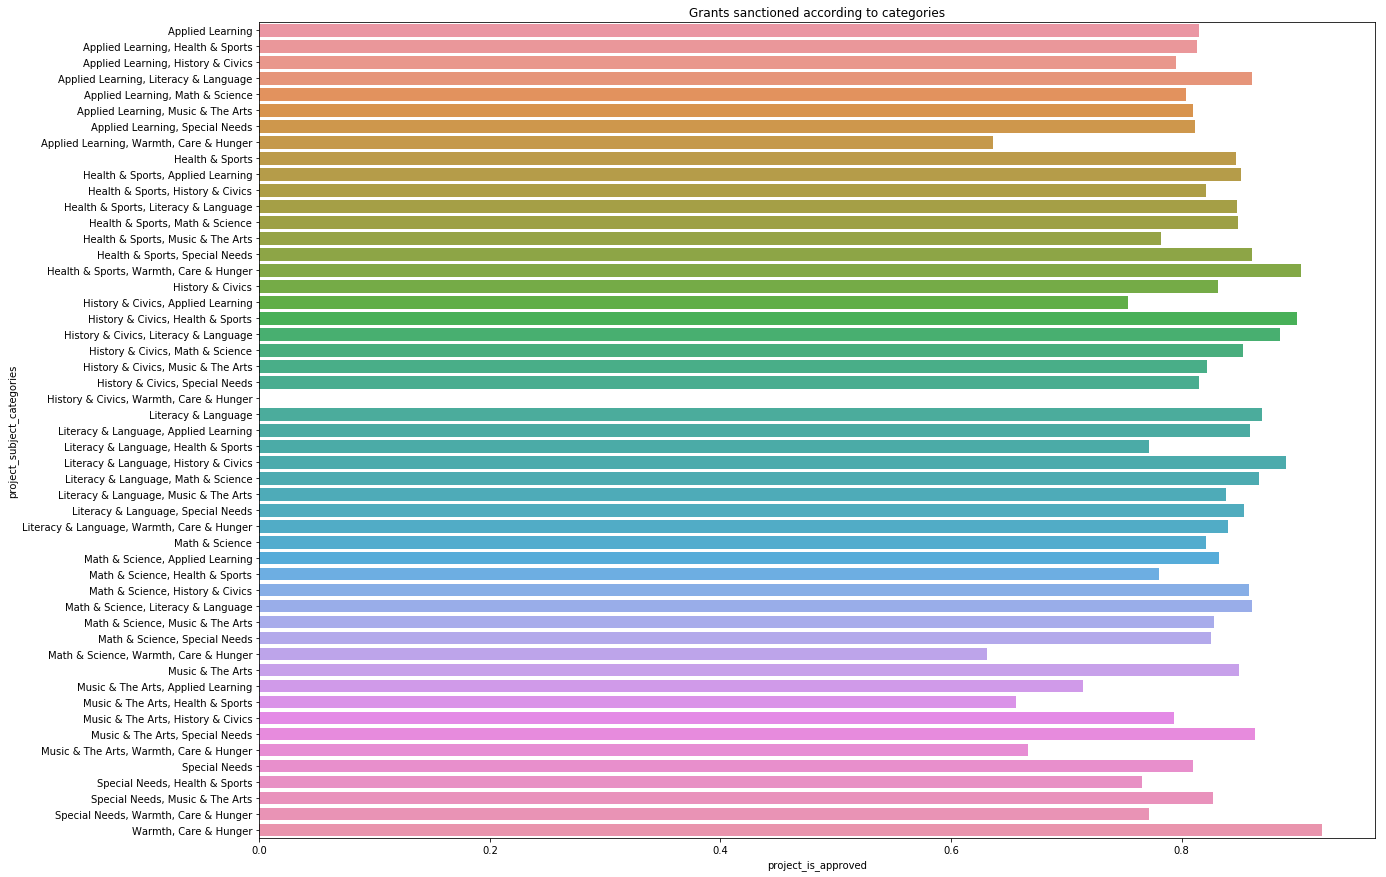

In [16]:
categories_recieving_grant = train_data[["project_subject_categories","project_is_approved"]].groupby("project_subject_categories").mean().reset_index()
#grant_per_state1["state"] = grant_per_state.index

fig = plt.figure(figsize = (20,15))
plt.title("Grants sanctioned according to categories")
sns.barplot(x= categories_recieving_grant.project_is_approved, y=categories_recieving_grant.project_subject_categories )


It seems approval rate is more or less similar for all categories except for one category. To be sure, lets find the count submitted each category as well as their ratio.

### Submissions per category

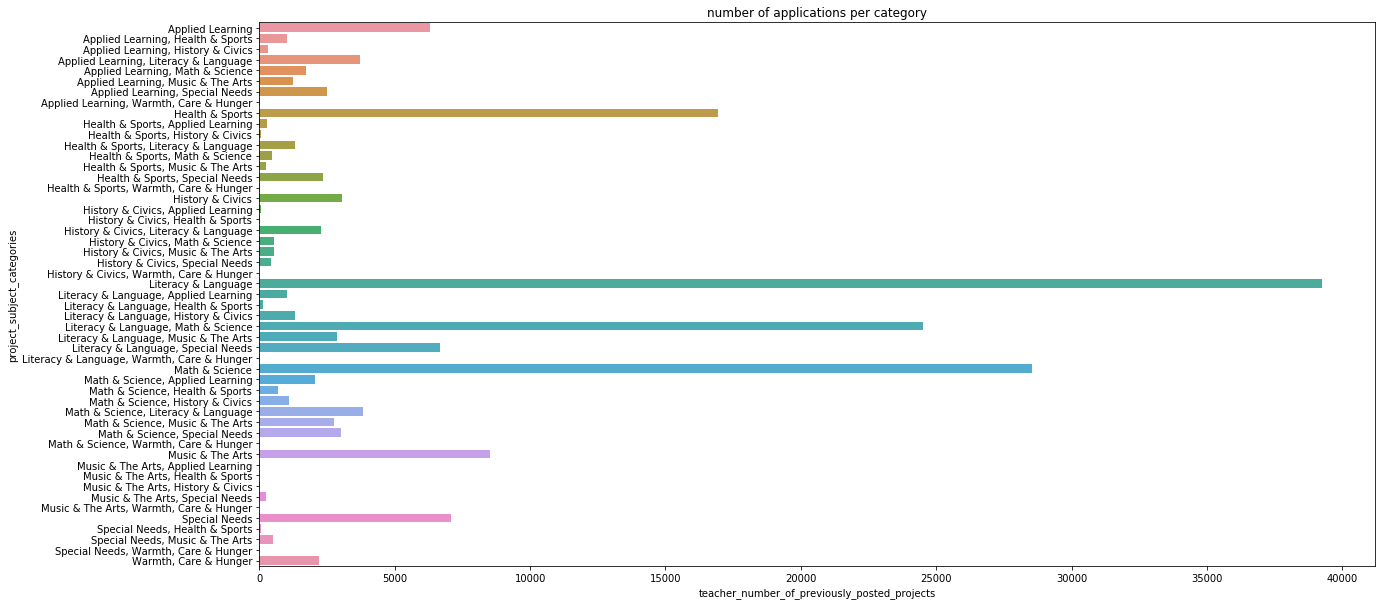

In [17]:

# categories_recieving_grant_per_number_of_essay = train_data[['project_subject_categories','teacher_number_of_previously_posted_projects']].groupby('project_subject_categories').count().reset_index()
# fig = plt.figure(figsize = (20,10))
# plt.title("COMPARISON: Project submitted according to their respective categories")
# sns.barplot(x = categories_recieving_grant_per_number_of_essay.teacher_number_of_previously_posted_projects, y = categories_recieving_grant_per_number_of_essay.index)

categories_recieving_grant_per_number_of_essay = train_data[["project_subject_categories","teacher_number_of_previously_posted_projects"]].groupby("project_subject_categories").count().reset_index()
categories_recieving_grant_per_number_of_essay["category"] = categories_recieving_grant_per_number_of_essay.index

fig = plt.figure(figsize = (20,10))
plt.title("number of applications per category")
sns.barplot(x= categories_recieving_grant_per_number_of_essay.teacher_number_of_previously_posted_projects, y= categories_recieving_grant_per_number_of_essay.project_subject_categories)


It seems there is high variability in submission of projects as per each category.

### Submission-Approval ratio per category

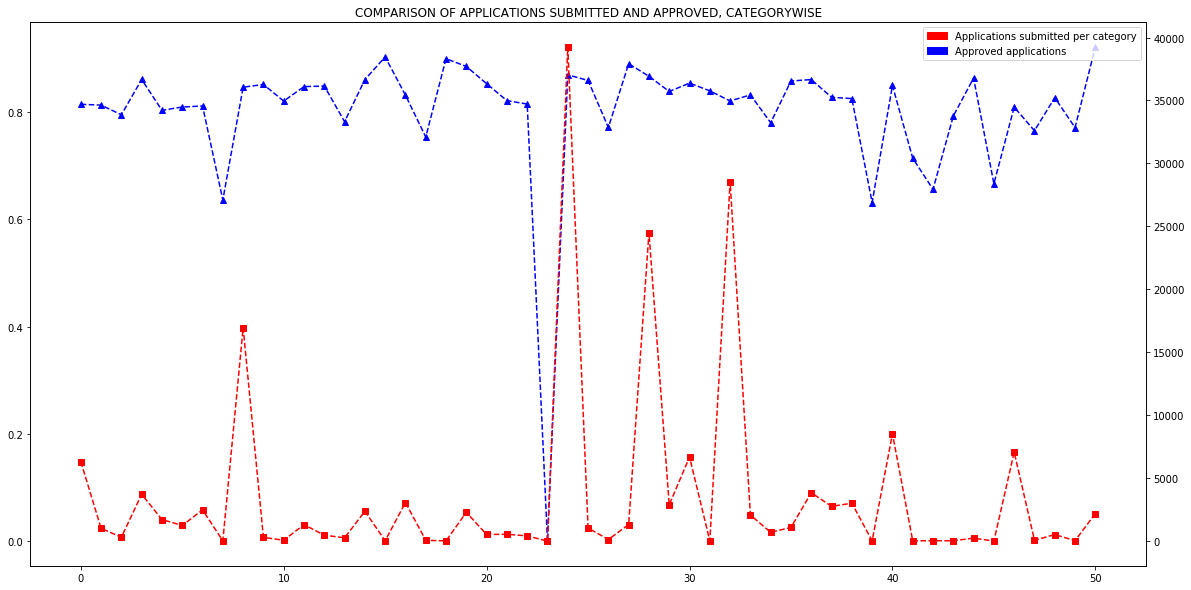

In [18]:
fig = plt.figure(figsize = (20,10))
plt.title("COMPARISON OF APPLICATIONS SUBMITTED AND APPROVED, CATEGORYWISE")
ax1 = plt.subplot(1,1,1)
plt.plot(categories_recieving_grant.index, categories_recieving_grant.project_is_approved, '--b^')
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()

plt.plot(categories_recieving_grant_per_number_of_essay.index,categories_recieving_grant_per_number_of_essay.teacher_number_of_previously_posted_projects, '--rs')

red = mpatches.Patch(color='red', label='Applications submitted per category')
blue = mpatches.Patch(color='blue', label='Approved applications')
plt.legend(handles=[red, blue])


It is pretty evident from this graph that acceptance rate is negatively related to total no. of applications/category submitted. Lesser the number of applications in a category, higher is the acceptance rate and vice versa.

## 4.5 Sub Category Based Analysis

### Project approved per sub category

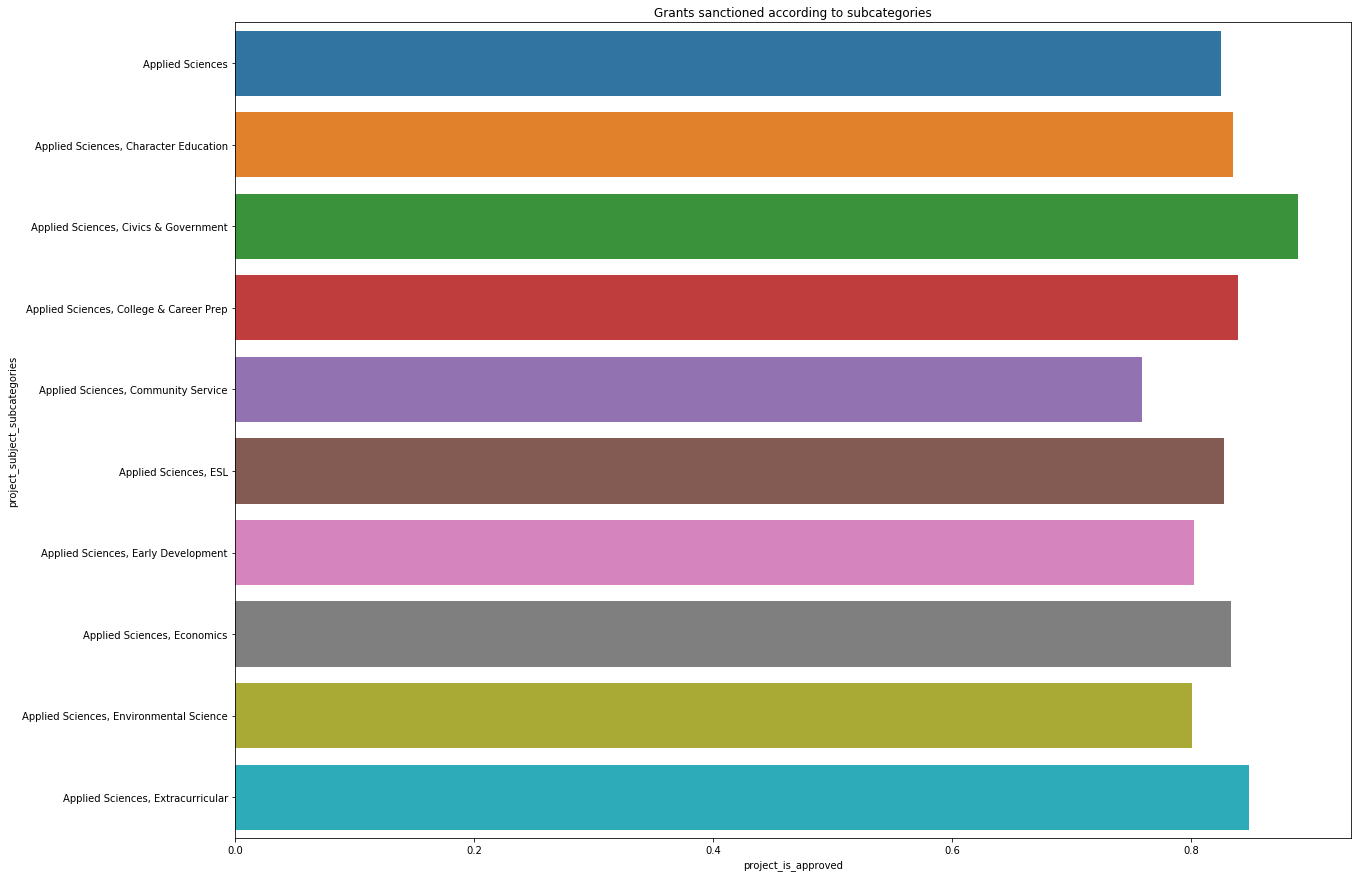

In [19]:
subcategories_recieving_grant = train_data[["project_subject_subcategories","project_is_approved"]].groupby("project_subject_subcategories").mean().reset_index()
#grant_per_state1["state"] = grant_per_state.index
yax= subcategories_recieving_grant.project_subject_subcategories.sort_values(ascending=True)[:10]
fig = plt.figure(figsize = (20,15))
plt.title("Grants sanctioned according to subcategories")
sns.barplot(x= subcategories_recieving_grant.project_is_approved, y=yax)

It seems approval rate is more or less similar for all subcategories(displaying top 10).

### Submissions per subcategory

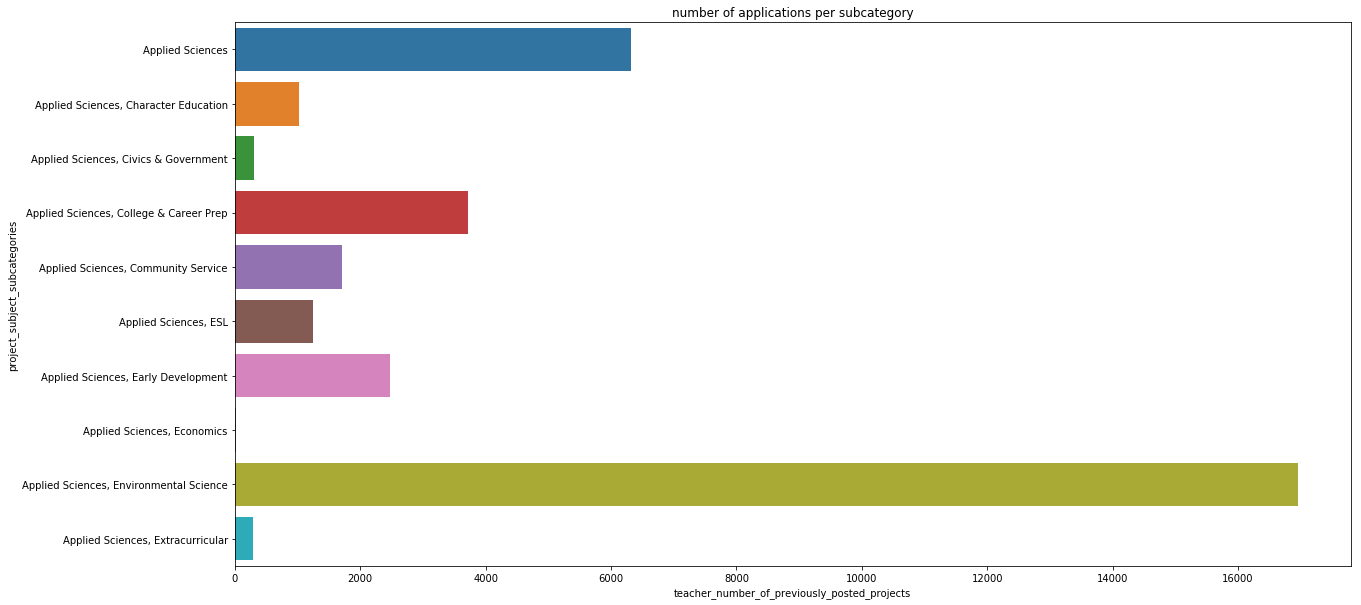

In [20]:

# categories_recieving_grant_per_number_of_essay = train_data[['project_subject_categories','teacher_number_of_previously_posted_projects']].groupby('project_subject_categories').count().reset_index()
# fig = plt.figure(figsize = (20,10))
# plt.title("COMPARISON: Project submitted according to their respective categories")
# sns.barplot(x = categories_recieving_grant_per_number_of_essay.teacher_number_of_previously_posted_projects, y = categories_recieving_grant_per_number_of_essay.index)

subcategories_recieving_grant_per_number_of_essay = train_data[["project_subject_subcategories","teacher_number_of_previously_posted_projects"]].groupby("project_subject_subcategories").count().reset_index()
subcategories_recieving_grant_per_number_of_essay["subcategory"] = subcategories_recieving_grant_per_number_of_essay.index
yax1= subcategories_recieving_grant_per_number_of_essay.project_subject_subcategories.sort_values(ascending=True)[:10]

fig = plt.figure(figsize = (20,10))
plt.title("number of applications per subcategory")
sns.barplot(x= categories_recieving_grant_per_number_of_essay.teacher_number_of_previously_posted_projects, y= yax1)


It seems there is high variability in submission of projects as per each subcategory.

### Submission-Approval ratio per subcategory

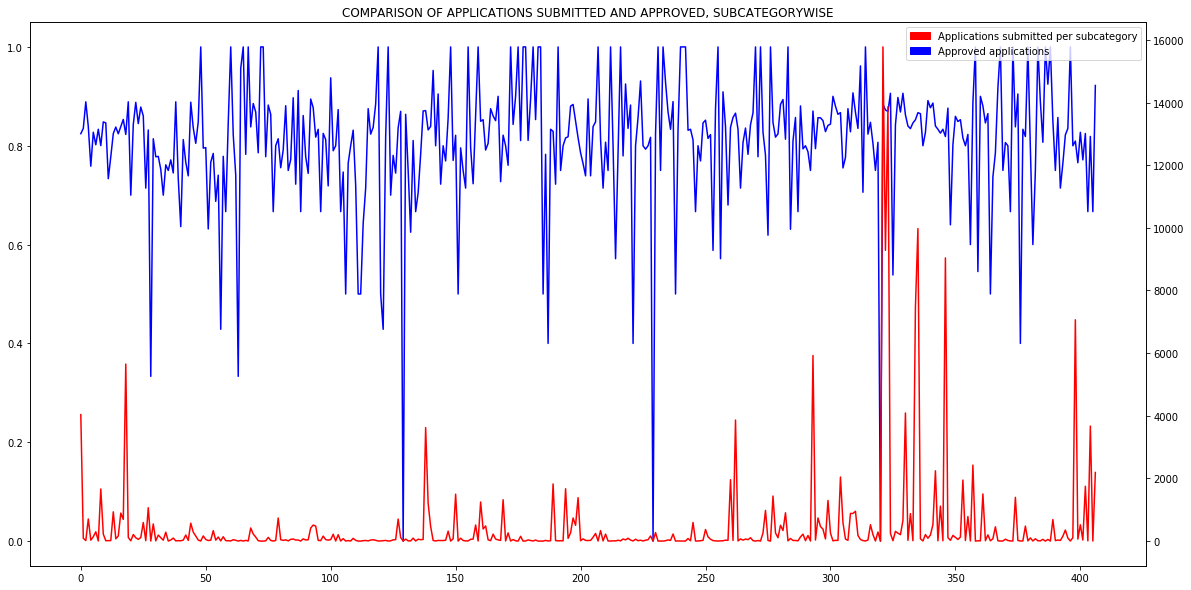

In [21]:
fig = plt.figure(figsize = (20,10))
plt.title("COMPARISON OF APPLICATIONS SUBMITTED AND APPROVED, SUBCATEGORYWISE")
ax1 = plt.subplot(1,1,1)
plt.plot(subcategories_recieving_grant.index, subcategories_recieving_grant.project_is_approved, '-b')
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()

plt.plot(subcategories_recieving_grant_per_number_of_essay.index,subcategories_recieving_grant_per_number_of_essay.teacher_number_of_previously_posted_projects, '-r')

red = mpatches.Patch(color='red', label='Applications submitted per subcategory')
blue = mpatches.Patch(color='blue', label='Approved applications')
plt.legend(handles=[red, blue])


It is pretty evident from this graph that acceptance rate is negatively related to total no. of applications/subcategory submitted. Lesser the number of applications in a subcategory, higher is the acceptance rate and vice versa.

## 4.6 Submission time based analysis

In [22]:
train_data["project_submitted_datetime"] = pd.to_datetime( train_data.project_submitted_datetime )
train_data["date"] = train_data.project_submitted_datetime.apply( lambda x: x.date() )
train_data["month"] = train_data.project_submitted_datetime.apply( lambda x: x.month )
train_data["weekday"] = train_data.project_submitted_datetime.apply( lambda x: x.weekday )
train_data["year"] = train_data.project_submitted_datetime.apply( lambda x: x.year )

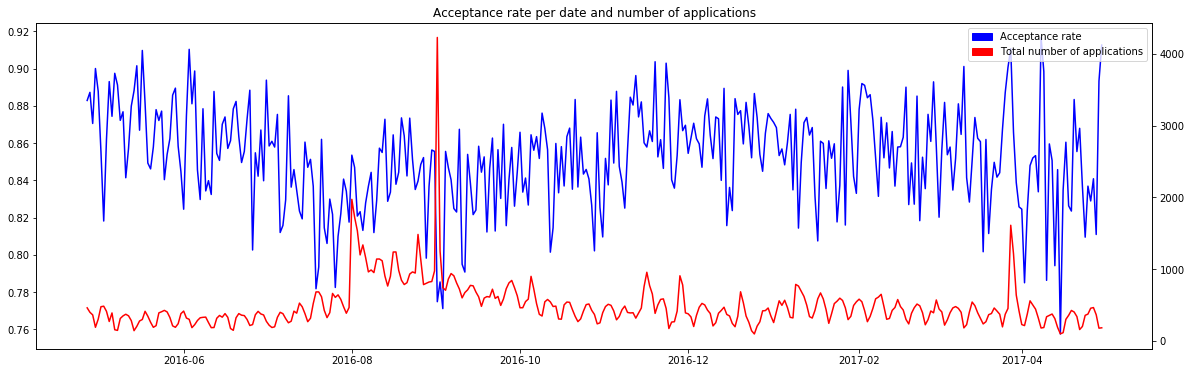

In [23]:
dateAcceptance = train_data[["date","project_is_approved"]].groupby("date").mean()
dateAcceptanceCount = train_data[["date","project_is_approved"]].groupby("date").count() 

fig = plt.figure( figsize=(20,6))
plt.title("Acceptance rate per date and number of applications")
ax1 = plt.subplot(1,1,1)
plt.plot(dateAcceptance,'-b'  )
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()
plt.plot(dateAcceptanceCount, '-r'  )
red_patch = mpatches.Patch(color='red', label='Total number of applications')
blue_patch = mpatches.Patch(color='blue', label='Acceptance rate')
plt.legend(handles=[blue_patch, red_patch])

Acceptance rate has no concern wrt to date submitted. It is almost the same.

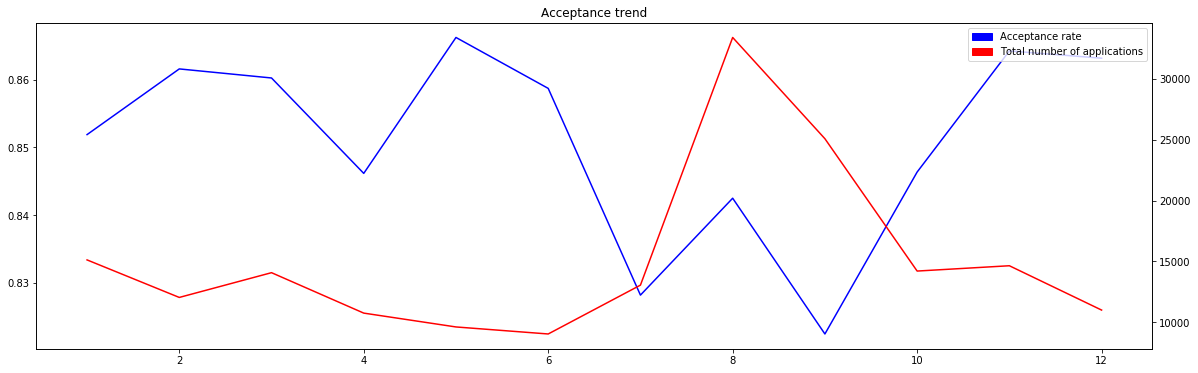

In [24]:
monthAcceptance = train_data[["month","project_is_approved"]].groupby("month").mean()
monthAcceptanceCount = train_data[["month","project_is_approved"]].groupby("month").count() 

fig = plt.figure( figsize=(20,6))

plt.title("Acceptance trend")

ax1 = plt.subplot(1,1,1)
plt.plot(monthAcceptance ,'-b'  )
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()
plt.plot(monthAcceptanceCount, '-r'  )

red_patch = mpatches.Patch(color='red', label='Total number of applications')
blue_patch = mpatches.Patch(color='blue', label='Acceptance rate')
plt.legend(handles=[blue_patch, red_patch])

But it is evident from this graph that acceptance rate is negatively related to total no. of applications/month submitted. Lesser the number of applications in a month, higher is the acceptance rate and vice versa.

## 4.7 Grade Acceptance Analysis

### Project approved per grade

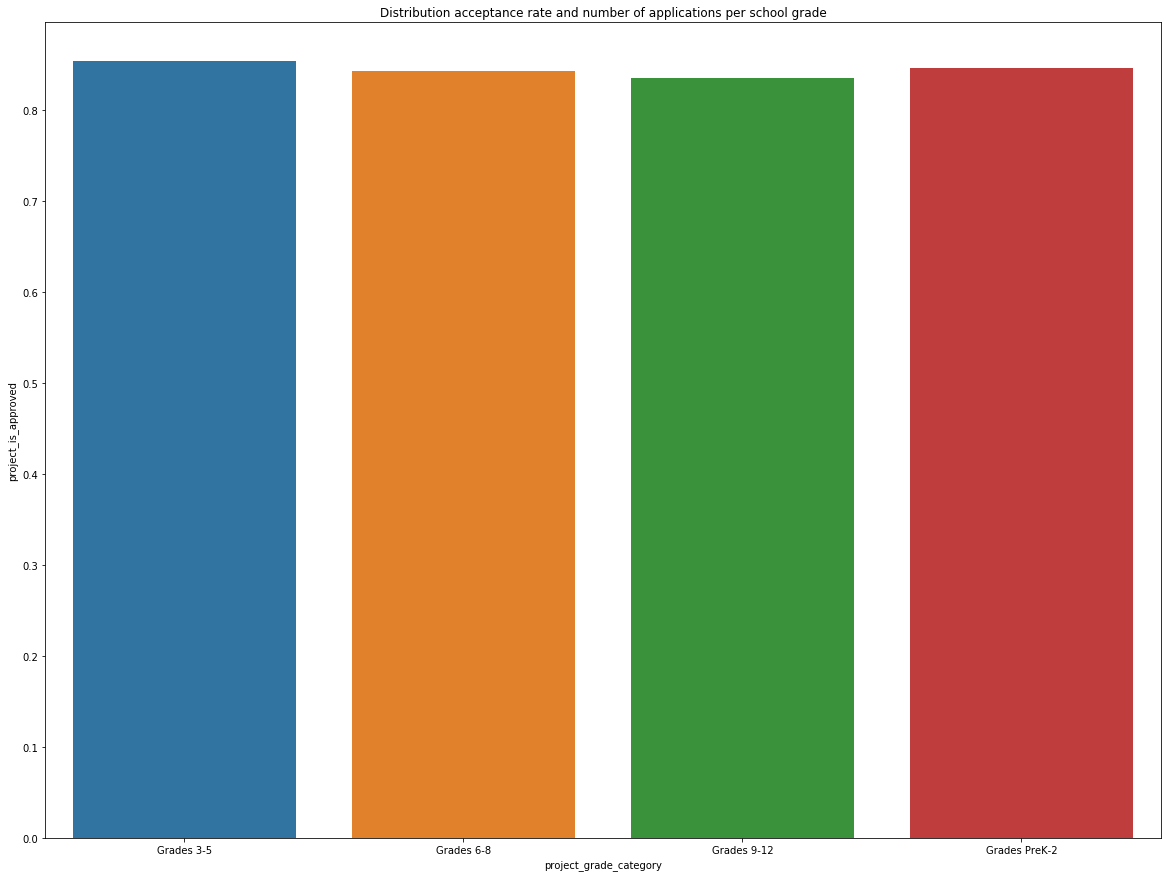

In [25]:
grant_per_grade = train_data[["project_grade_category","project_is_approved"]].groupby("project_grade_category").mean().reset_index()
#grant_per_state1["state"] = grant_per_state.index

fig = plt.figure(figsize = (20,15))
plt.title("Distribution acceptance rate and number of applications per school grade")
sns.barplot(x= grant_per_grade.project_grade_category, y= grant_per_grade.project_is_approved)

Approval rate is more or less same for each category

### Submissions per grade

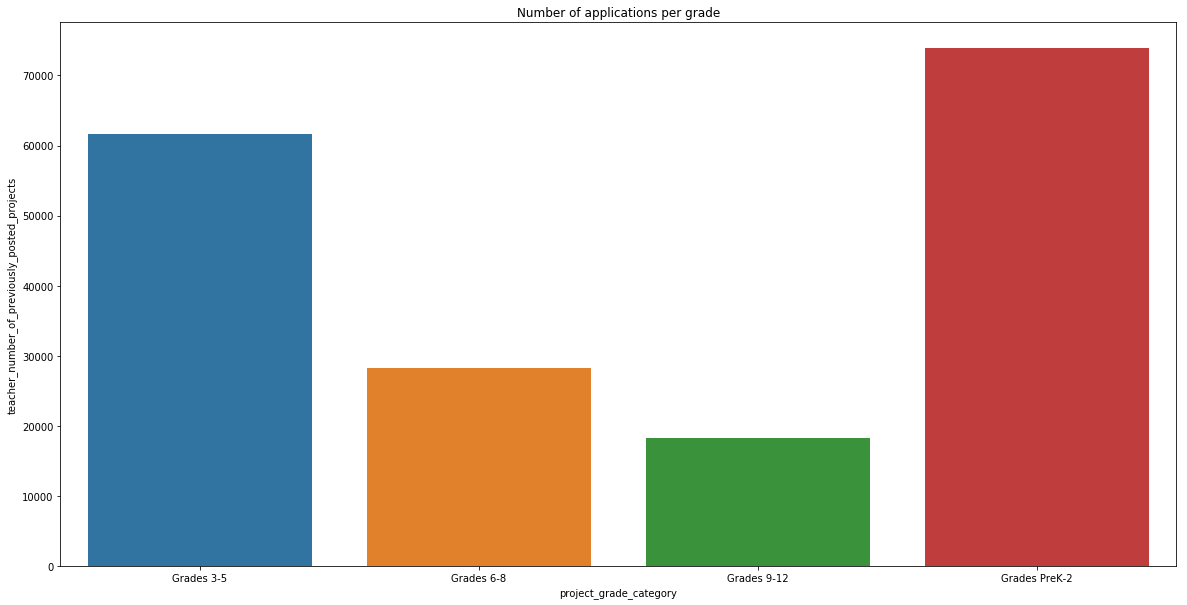

In [26]:
grant_per_grade_per_number_of_essay = train_data[["project_grade_category","teacher_number_of_previously_posted_projects"]].groupby("project_grade_category").count().reset_index()
#grant_per_category_per_number_of_essay["project_grade_category"] = grant_per_category_per_number_of_essay.index

fig = plt.figure(figsize = (20,10))

#grant_per_category_per_number_of_essay
plt.title("Number of applications per grade")
sns.barplot(x= grant_per_grade_per_number_of_essay.project_grade_category, y= grant_per_grade_per_number_of_essay.teacher_number_of_previously_posted_projects)

It seems highest number of applications are accepted for category Grades PreK-2

### Submission-Approval ratio per grade

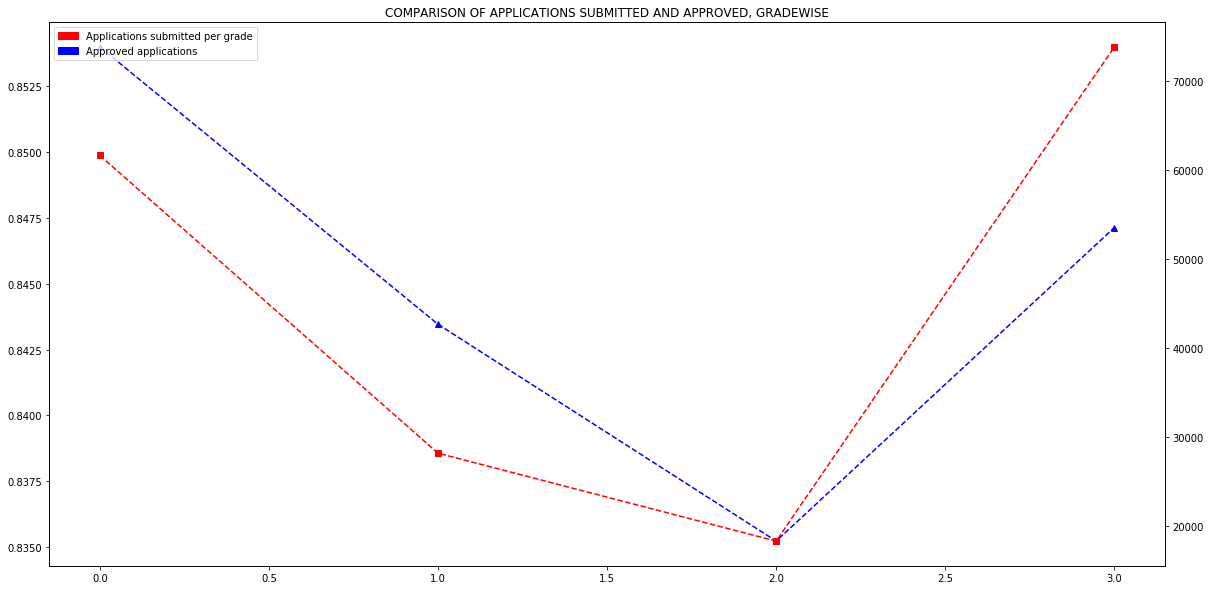

In [27]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize = (20,10))
plt.title("COMPARISON OF APPLICATIONS SUBMITTED AND APPROVED, GRADEWISE")
ax1 = plt.subplot(1,1,1)
plt.plot(grant_per_grade.index, grant_per_grade.project_is_approved, '--b^')
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()

plt.plot(grant_per_grade_per_number_of_essay.index,grant_per_grade_per_number_of_essay.teacher_number_of_previously_posted_projects, '--rs')

red = mpatches.Patch(color='red', label='Applications submitted per grade')
blue = mpatches.Patch(color='blue', label='Approved applications')
plt.legend(handles=[red, blue])

From the earlier graphs, it appeared as if there might be some biasness towards category, but this submission-approval ratio graph clearly states that the ratio is almost similar for all the categories; infact we can see it's linearly related.

## 4.8 Teacher Prefix based analysis

In [28]:
train_data.teacher_prefix.unique()

array(['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.', nan], dtype=object)

In [29]:
prefixAceptance = train_data[["teacher_prefix","project_is_approved"]].groupby("teacher_prefix").mean()
prefixAceptance["prefix"] = prefixAceptance.index

genderDictionary = {"Ms.": "Female", "Mrs.":"Female", "Mr.":"Male", "Teacher":"Neutral", "Dr.":"Neutral", np.nan:"Neutral"  }
train_data["gender"] = train_data.teacher_prefix.map( genderDictionary )
genderAceptance = train_data[["gender","project_is_approved"]].groupby("gender").mean()

titleDictionary = {"Ms.": "Na", "Mrs.":"Na", "Mr.":"Na", "Teacher":"Teacher", "Dr.":"Dr.", np.nan:"Na"  }
train_data["title"] = train_data.teacher_prefix.map( titleDictionary )
titleAceptance = train_data[["title","project_is_approved"]].groupby("title").mean()

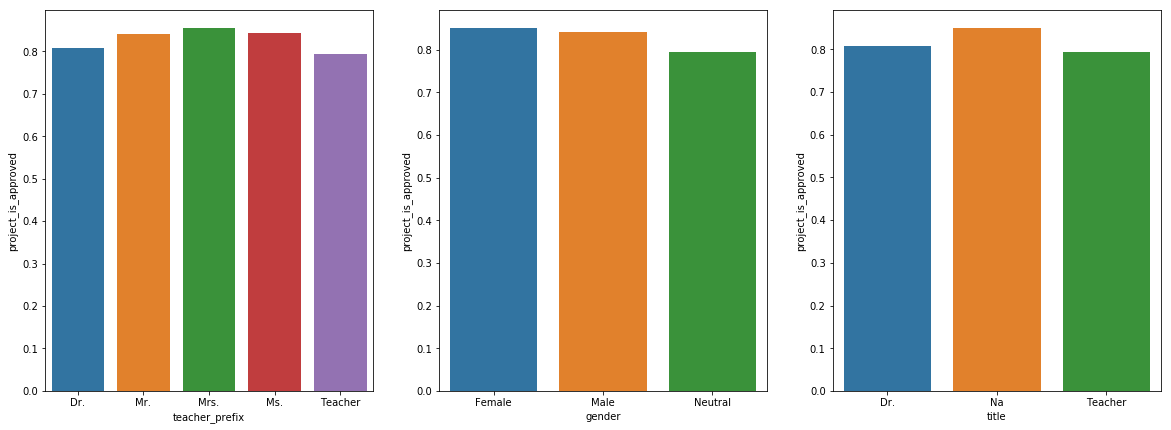

In [30]:
fig  = plt.figure(figsize=(20,7))
ax1 = plt.subplot(1,3,1)
sns.barplot(x = prefixAceptance.index, y =prefixAceptance.project_is_approved )
ax2 = plt.subplot(1,3,2)
sns.barplot(x = genderAceptance.index, y =genderAceptance.project_is_approved )
ax3 = plt.subplot(1,3,3)
sns.barplot(x = titleAceptance.index, y =titleAceptance.project_is_approved )

It looks like there is not a real correlation between the prefix of the title and the acceptance rate of the projects.

# 5. Imputing the missing data

In [31]:
train_data.loc[train_data.project_essay_4.isnull(),['project_essay_4','project_essay_2']] = train_data.loc[train_data.project_essay_4.isnull(),['project_essay_2','project_essay_4']].values

train_data[['project_essay_2', 'project_essay_3']] = train_data[['project_essay_2', 'project_essay_3']].fillna('')
train_data['project_essay_1'] = train_data.apply(lambda row: ' '.join([str(row['project_essay_1']), 
                                                     str(row['project_essay_2'])]), axis=1)
train_data['project_essay_2'] = train_data.apply(lambda row: ' '.join([str(row['project_essay_3']), 
                                                     str(row['project_essay_4'])]), axis=1)
train_data = train_data.drop(['project_essay_3', 'project_essay_4'], axis=1)


train_data.head()


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,approved,date,month,weekday,year,gender,title
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,My students need 6 Ipod Nano's to create and d...,26,1,True,2016-11-18,11,<built-in method weekday of Timestamp object a...,2016,Female,Na
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,My students need matching shirts to wear for d...,1,0,False,2017-04-26,4,<built-in method weekday of Timestamp object a...,2017,Female,Na
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,My students need the 3doodler. We are an SEM s...,5,1,True,2017-01-01,1,<built-in method weekday of Timestamp object a...,2017,Female,Na
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,My students need balls and other activity equi...,16,0,False,2016-08-12,8,<built-in method weekday of Timestamp object a...,2016,Male,Na
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,My students need a water filtration system for...,42,1,True,2016-08-06,8,<built-in method weekday of Timestamp object a...,2016,Male,Na


In [32]:
list(train_data)

['id',
 'teacher_id',
 'teacher_prefix',
 'school_state',
 'project_submitted_datetime',
 'project_grade_category',
 'project_subject_categories',
 'project_subject_subcategories',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_resource_summary',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'approved',
 'date',
 'month',
 'weekday',
 'year',
 'gender',
 'title']

# 6. Considering the quantity and price feature

In [33]:
resource['total_price'] = resource['quantity']*resource['price']
resource.head()

,id,description,quantity,price,total_price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95,44.85
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59,27.18
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95,74.85


In [34]:
new_resource = resource.groupby('id').agg({'description':'count',
                            'quantity':'sum',
                            'price':'sum',
                            'total_price':'sum'}).rename(columns={'description':'total_items'})
new_resource['avg_price'] = new_resource['total_price'] / new_resource['quantity']
new_resource.head()

,total_items,quantity,price,total_price,avg_price
id,,,,,
p000001,4,7,459.56,833.63,119.090000
p000002,14,21,515.89,630.28,30.013333
p000003,4,4,298.97,298.97,74.742500
p000004,95,98,1113.69,1126.22,11.492041
p000005,4,8,485.99,702.31,87.788750


In [35]:
numFeatures = ['total_items', 'quantity', 'price', 'total_price', 'avg_price']

for func in ['min', 'max', 'mean']:
    new_resource = new_resource.join(resource.groupby('id').agg({'quantity':func,
                                          'price':func,
                                          'total_price':func}).rename(
                                columns={'quantity':func+'Quantity',
                                         'price':func+'Price',
                                         'total_price':func+'total_price'}).fillna(0))
    numFeatures += [func+'Quantity', func+'Price', func+'PriceAll']

new_resource = new_resource.join(resource.groupby('id').agg({'description':lambda x:' '.join(x.values.astype(str))}).rename(
    columns={'description':'resource_description'}))

train_data = train_data.join(new_resource, on='id')
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,minQuantity,minPrice,mintotal_price,maxQuantity,maxPrice,maxtotal_price,meanQuantity,meanPrice,meantotal_price,resource_description
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,3,149.99,449.97,3,149.99,449.97,3.0,149.990,449.970,Apple - iPod nano� 16GB MP3 Player (8th Genera...
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,20.00,400.00,20,20.00,400.00,20.0,20.000,400.000,Reebok Girls' Fashion Dance Graphic T-Shirt - ...
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,1,469.99,469.99,1,469.99,469.99,1.0,469.990,469.990,3doodler Start Full Edu Bundle
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,1,18.95,18.95,1,354.99,354.99,1.0,136.894,136.894,BALL PG 4'' POLY SET OF 6 COLORS BALL PLAYGROU...
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,2,355.50,711.00,2,355.50,711.00,2.0,355.500,711.000,Crown Berkey Water Filter With 2 Black and 2 P...


# 7. Sentiment Analysis(Finding the subjectivity and polarity)

In [36]:
textColumns = ['project_essay_1', 'project_essay_2', 'project_resource_summary', 'resource_description', 'project_title']
def getSentFeat(s):
    sent = TextBlob(s).sentiment
    return (sent.polarity, sent.subjectivity)

print('sentimental analysis')
with Pool(4) as p:
    for col in textColumns:
        temp = pl.array(list(p.map(getSentFeat, train_data[col])))
        train_data[col+'_pol'] = temp[:,0]
        train_data[col+'_sub'] = temp[:,1]
        numFeatures += [col+'_pol', col+'_sub']

sentimental analysis


In [37]:
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_pol,project_essay_1_sub,project_essay_2_pol,project_essay_2_sub,project_resource_summary_pol,project_resource_summary_sub,resource_description_pol,resource_description_sub,project_title_pol,project_title_sub
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,0.249909,0.439385,0.144444,0.300000,0.400000,0.700000,0.333333,0.633333,0.333333,0.666667
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,0.263750,0.717500,0.111905,0.459524,0.000000,0.000000,-0.066667,0.300000,0.300000,0.750000
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,0.345739,0.487879,0.367857,0.614286,1.000000,0.300000,0.350000,0.550000,0.000000,0.000000
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,0.162302,0.391270,0.193033,0.447744,-0.041667,0.372619,0.000000,0.000000,0.500000,0.500000
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,0.407143,0.606122,0.190741,0.519136,0.000000,0.000000,-0.166667,0.433333,0.183333,0.350000


In [38]:
import re

print('common words')
for i, col1 in enumerate(textColumns[:-1]):
    for col2 in textColumns[i+1:]:
        train_data['%s_%s_common' % (col1, col2)] = train_data.apply(lambda row:len(set(re.split('\W', row[col1])).intersection(re.split('\W', row[col2]))), axis=1)
        numFeatures.append('%s_%s_common' % (col1, col2))

common words


In [39]:
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,22,7,1,0,16,1,0,1,0,0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,5,1,1,6,1,1,1,1,1
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,30,15,0,1,16,0,1,1,0,0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,55,17,1,3,22,1,3,1,4,1
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,18,6,1,3,6,3,5,0,8,0


# 8. Converting the categorical variables into numerical

In [40]:
train_data["teacher_prefix"].value_counts()

Mrs.       95405
Ms.        65066
Mr.        17667
Teacher     3912
Dr.           26
Name: teacher_prefix, dtype: int64

In [41]:
cleanup_prefix = {}
for i,name in enumerate(train_data['teacher_prefix'].unique()):
    cleanup_prefix[name] = i+1
    
cleanup_prefix

{'Ms.': 1, 'Mrs.': 2, 'Mr.': 3, 'Teacher': 4, 'Dr.': 5, nan: 6}

In [42]:
imputed_prefix = {"teacher_prefix":    cleanup_prefix}
train_data.replace(imputed_prefix, inplace=True)
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p036502,484aaf11257089a66cfedc9461c6bd0a,1,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,22,7,1,0,16,1,0,1,0,0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,2,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,5,1,1,6,1,1,1,1,1
2,p233823,a9b876a9252e08a55e3d894150f75ba3,1,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,30,15,0,1,16,0,1,1,0,0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,3,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,55,17,1,3,22,1,3,1,4,1
4,p013780,a63b5547a7239eae4c1872670848e61a,3,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,18,6,1,3,6,3,5,0,8,0


In [43]:
numFeatures.append('teacher_prefix')

In [44]:
#train_data['school_state'].value_counts()
train_data['school_state'].unique()
#school_state = get_categorical_features(train_data, 'school_state', Encoder)

array(['NV', 'GA', 'UT', 'NC', 'CA', 'DE', 'MO', 'SC', 'IN', 'IL', 'VA',
       'PA', 'NY', 'FL', 'NJ', 'TX', 'LA', 'ID', 'OH', 'OR', 'MD', 'WA',
       'MA', 'KY', 'AZ', 'MI', 'CT', 'AR', 'WV', 'NM', 'WI', 'MN', 'OK',
       'AL', 'TN', 'IA', 'KS', 'CO', 'DC', 'WY', 'NH', 'HI', 'SD', 'MT',
       'MS', 'RI', 'VT', 'ME', 'NE', 'AK', 'ND'], dtype=object)

In [45]:
cleanup_state = {}
for i,name in enumerate(train_data['school_state'].unique()):
    cleanup_state[name] = i+1
    
cleanup_state

{'AK': 50,
 'AL': 34,
 'AR': 28,
 'AZ': 25,
 'CA': 5,
 'CO': 38,
 'CT': 27,
 'DC': 39,
 'DE': 6,
 'FL': 14,
 'GA': 2,
 'HI': 42,
 'IA': 36,
 'ID': 18,
 'IL': 10,
 'IN': 9,
 'KS': 37,
 'KY': 24,
 'LA': 17,
 'MA': 23,
 'MD': 21,
 'ME': 48,
 'MI': 26,
 'MN': 32,
 'MO': 7,
 'MS': 45,
 'MT': 44,
 'NC': 4,
 'ND': 51,
 'NE': 49,
 'NH': 41,
 'NJ': 15,
 'NM': 30,
 'NV': 1,
 'NY': 13,
 'OH': 19,
 'OK': 33,
 'OR': 20,
 'PA': 12,
 'RI': 46,
 'SC': 8,
 'SD': 43,
 'TN': 35,
 'TX': 16,
 'UT': 3,
 'VA': 11,
 'VT': 47,
 'WA': 22,
 'WI': 31,
 'WV': 29,
 'WY': 40}

In [46]:
imputed_state = {"school_state":    cleanup_state}
train_data.replace(imputed_state, inplace=True)
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p036502,484aaf11257089a66cfedc9461c6bd0a,1,1,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,22,7,1,0,16,1,0,1,0,0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,2,2,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,5,1,1,6,1,1,1,1,1
2,p233823,a9b876a9252e08a55e3d894150f75ba3,1,3,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,30,15,0,1,16,0,1,1,0,0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,3,4,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,55,17,1,3,22,1,3,1,4,1
4,p013780,a63b5547a7239eae4c1872670848e61a,3,5,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,18,6,1,3,6,3,5,0,8,0


In [47]:
#numFeatures
numFeatures.append('school_state')

In [48]:
#train_data['project_grade_category'].unique()
cleanup_grade = {}
for i,name in enumerate(train_data['project_grade_category'].unique()):
    cleanup_grade[name] = i+1

cleanup_grade

{'Grades 3-5': 2, 'Grades 6-8': 3, 'Grades 9-12': 4, 'Grades PreK-2': 1}

In [49]:
imputed_grade = {"project_grade_category":    cleanup_grade}
train_data.replace(imputed_grade, inplace=True)
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p036502,484aaf11257089a66cfedc9461c6bd0a,1,1,2016-11-18 14:45:59,1,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,22,7,1,0,16,1,0,1,0,0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,2,2,2017-04-26 15:57:28,2,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,5,1,1,6,1,1,1,1,1
2,p233823,a9b876a9252e08a55e3d894150f75ba3,1,3,2017-01-01 22:57:44,2,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,30,15,0,1,16,0,1,1,0,0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,3,4,2016-08-12 15:42:11,2,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,55,17,1,3,22,1,3,1,4,1
4,p013780,a63b5547a7239eae4c1872670848e61a,3,5,2016-08-06 09:09:11,3,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,18,6,1,3,6,3,5,0,8,0


In [50]:
numFeatures.append('project_grade_category')

In [51]:
cleanup_sub_cat = {}
for i,name in enumerate(train_data['project_subject_categories'].unique()):
    cleanup_sub_cat[name] = i+1
    
imputed_sub_cat = {"project_subject_categories": cleanup_sub_cat}
train_data.replace(imputed_sub_cat, inplace=True)
train_data.head()


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p036502,484aaf11257089a66cfedc9461c6bd0a,1,1,2016-11-18 14:45:59,1,1,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,22,7,1,0,16,1,0,1,0,0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,2,2,2017-04-26 15:57:28,2,2,"Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,5,1,1,6,1,1,1,1,1
2,p233823,a9b876a9252e08a55e3d894150f75ba3,1,3,2017-01-01 22:57:44,2,3,"Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,30,15,0,1,16,0,1,1,0,0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,3,4,2016-08-12 15:42:11,2,4,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,55,17,1,3,22,1,3,1,4,1
4,p013780,a63b5547a7239eae4c1872670848e61a,3,5,2016-08-06 09:09:11,3,4,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,18,6,1,3,6,3,5,0,8,0


In [52]:
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p036502,484aaf11257089a66cfedc9461c6bd0a,1,1,2016-11-18 14:45:59,1,1,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,22,7,1,0,16,1,0,1,0,0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,2,2,2017-04-26 15:57:28,2,2,"Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,5,1,1,6,1,1,1,1,1
2,p233823,a9b876a9252e08a55e3d894150f75ba3,1,3,2017-01-01 22:57:44,2,3,"Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,30,15,0,1,16,0,1,1,0,0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,3,4,2016-08-12 15:42:11,2,4,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,55,17,1,3,22,1,3,1,4,1
4,p013780,a63b5547a7239eae4c1872670848e61a,3,5,2016-08-06 09:09:11,3,4,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,18,6,1,3,6,3,5,0,8,0


In [53]:
# #train_data['project_title'][0]
# # for i,name in enumerate(train_data['project_title'][i]):
# #     print(name)
    
# for i in range(0,len(train_data['project_title'])):
#     train_data['project_title_stem'] = re.sub('\W+','',train_data['project_title'][i])
#     #cleanString = re.sub('\W+','', string )
numFeatures.append('project_subject_categories')

# 9. Text Engineering

In [54]:
#nltk.download()
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import punkt
from nltk.stem import SnowballStemmer

### Text preprocessing (Stemming and removing the stop words)

In [55]:
stemmer = SnowballStemmer('english')
words = set(stopwords.words('english'))

for k in textColumns:
    print('processing column:   '+ k)
    train_data[k+'_new'] = train_data[k].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in words]).lower())

processing column:   project_essay_1
processing column:   project_essay_2
processing column:   project_resource_summary
processing column:   resource_description
processing column:   project_title


In [56]:
# train_data.drop('project_title',axis=1,inplace = True)
# train_data.drop('project_essay_1',axis=1,inplace=True)
# train_data.drop('project_essay_2',axis=1,inplace=True)
# train_data.drop('project_resource_summary',axis=1,inplace=True)
# train_data.drop('resource_description',axis=1,inplace=True)

In [57]:
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common,project_essay_1_new,project_essay_2_new,project_resource_summary_new,resource_description_new,project_title_new
0,p036502,484aaf11257089a66cfedc9461c6bd0a,1,1,2016-11-18 14:45:59,1,1,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,1,0,1,0,0,most kindergarten student come low incom house...,i current differenti sight word center daili l...,my student need ipod nano creat differenti eng...,appl ipod nano gb mp player th generat latest ...,super sight word center
1,p039565,df72a3ba8089423fa8a94be88060f6ed,2,2,2017-04-26 15:57:28,2,2,"Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,1,1,1,1,1,our elementari school cultur rich school diver...,we strive provid divers popul student extra cu...,my student need match shirt wear danc perform ...,reebok girl fashion danc graphic t shirt dd da...,keep calm danc on
2,p233823,a9b876a9252e08a55e3d894150f75ba3,1,3,2017-01-01 22:57:44,2,3,"Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,0,1,1,0,0,hello r nmi name mrs brotherton i teach th gra...,we look add doodler classroom it would wonder ...,my student need doodler we sem school mean stu...,doodler start full edu bundl,let doodl learn
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,3,4,2016-08-12 15:42:11,2,4,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,1,3,1,4,1,my student greatest student social econom disa...,the student project total kid inspir decid nee...,my student need ball activ equip meet need kid...,ball pg poli set of color ball playground poli...,kid inspir equip increas activ gain better health
4,p013780,a63b5547a7239eae4c1872670848e61a,3,5,2016-08-06 09:09:11,3,4,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,3,5,0,8,0,my student athlet student interest health phys...,for reason kitchen water come faucet white loo...,my student need water filtrat system culinari ...,crown berkey water filter with black pf fluori...,we need clean water culinari art class


In [58]:
list(train_data)

['id',
 'teacher_id',
 'teacher_prefix',
 'school_state',
 'project_submitted_datetime',
 'project_grade_category',
 'project_subject_categories',
 'project_subject_subcategories',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_resource_summary',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'approved',
 'date',
 'month',
 'weekday',
 'year',
 'gender',
 'title',
 'total_items',
 'quantity',
 'price',
 'total_price',
 'avg_price',
 'minQuantity',
 'minPrice',
 'mintotal_price',
 'maxQuantity',
 'maxPrice',
 'maxtotal_price',
 'meanQuantity',
 'meanPrice',
 'meantotal_price',
 'resource_description',
 'project_essay_1_pol',
 'project_essay_1_sub',
 'project_essay_2_pol',
 'project_essay_2_sub',
 'project_resource_summary_pol',
 'project_resource_summary_sub',
 'resource_description_pol',
 'resource_description_sub',
 'project_title_pol',
 'project_title_sub',
 'project_essay_1_project_essay_2_common',
 'project_essay_1_project_resource_su

In [59]:
title_str_pos=train_data.project_title_new[train_data['project_is_approved']==1].str.cat(sep=' ')
title_str_neg=train_data.project_title_new[train_data['project_is_approved']==0].str.cat(sep=' ')
# df.loc[df['column_name'] == some_value]

In [60]:
essay1_str_pos=train_data.project_essay_1_new[train_data['project_is_approved']==1].str.cat(sep=' ')
essay1_str_neg=train_data.project_essay_1_new[train_data['project_is_approved']==0].str.cat(sep=' ')

In [61]:
essay2_str_pos=train_data.project_essay_2_new[train_data['project_is_approved']==1].str.cat(sep=' ')
essay2_str_neg=train_data.project_essay_2_new[train_data['project_is_approved']==0].str.cat(sep=' ')

In [62]:
summary_str_pos=train_data.project_resource_summary_new[train_data['project_is_approved']==1].str.cat(sep=' ')
summary_str_neg=train_data.project_resource_summary_new[train_data['project_is_approved']==0].str.cat(sep=' ')

In [63]:
description_str_pos=train_data.resource_description_new[train_data['project_is_approved']==1].str.cat(sep=' ')
description_str_neg=train_data.resource_description_new[train_data['project_is_approved']==0].str.cat(sep=' ')

### Finding important words in all these documents

In [64]:
textfile = open('titlepos.txt', 'w')
textfile.write(title_str_pos)
textfile.close()

In [65]:
len(title_str_pos.split())

668807

In [66]:
textfile = open('titleneg.txt', 'w')
textfile.write(title_str_neg)
textfile.close()

In [67]:
textfile = open('essay1pos.txt', 'w')
textfile.write(essay1_str_pos)
textfile.close()

In [68]:
textfile = open('essay1neg.txt', 'w')
textfile.write(essay1_str_neg)
textfile.close()

In [69]:
textfile = open('essay2pos.txt', 'w')
textfile.write(essay2_str_pos)
textfile.close()

In [70]:
textfile = open('essay2neg.txt', 'w')
textfile.write(essay2_str_neg)
textfile.close()

In [71]:
textfile = open('summarypos.txt', 'w')
textfile.write(summary_str_pos)
textfile.close()

In [72]:
textfile = open('summaryneg.txt', 'w')
textfile.write(summary_str_neg)
textfile.close()

In [73]:
textfile = open('descriptionpos.txt', 'w')
textfile.write(description_str_pos)
textfile.close()

In [74]:
textfile = open('descriptionneg.txt', 'w')
textfile.write(description_str_neg)
textfile.close()

The 30 most common words for approved title are as follows

learn :  17300
read :  10827
need :  9174
student :  8991
technolog :  8572
book :  8387
classroom :  8167
help :  6879
seat :  6651
chromebook :  4537
flexibl :  4424
math :  4384
make :  4153
move :  3776
ipad :  3743
through :  3668
suppli :  3606
grade :  3393
scienc :  3278
reader :  3209
wiggl :  3170
my :  3109
success :  3049
fun :  2959
art :  2922
learner :  2921
work :  2868
build :  2746
world :  2739
you :  2735


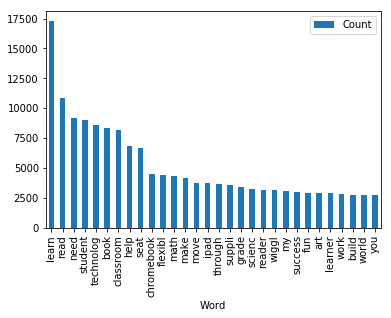

In [75]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('titlepos.txt', encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for approved title are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for unapproved title are as follows

learn :  3276
student :  1640
read :  1637
classroom :  1575
need :  1448
seat :  1434
technolog :  1306
help :  1197
math :  1143
suppli :  1119
flexibl :  1097
book :  895
make :  852
scienc :  823
art :  767
stem :  767
through :  749
fun :  720
grade :  650
move :  639
hand :  597
build :  589
mind :  565
center :  562
school :  558
success :  553
my :  515
play :  511
creat :  510
futur :  507


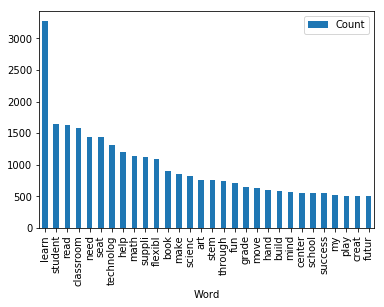

In [76]:
file = open('titleneg.txt', encoding="utf8")
a1= file.read()
# Stopwords
stopwords1 = set(line.strip() for line in open('stopwords.txt'))
stopwords1 = stopwords1.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount1 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a1.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords1:
        if word not in wordcount1:
            wordcount1[word] = 1
        else:
            wordcount1[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for unapproved title are as follows\n".format(n_print))
word_counter1 = collections.Counter(wordcount1)
for word, count in word_counter1.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst1 = word_counter1.most_common(n_print)
df = pd.DataFrame(lst1, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for approved essay1 are as follows

student :  564973
school :  285368
learn :  225787
classroom :  107968
come :  100056
mani :  91715
work :  81917
need :  81067
love :  77586
day :  68802
year :  60073
class :  58687
grade :  57763
teach :  56470
read :  53851
help :  53318
educ :  47715
high :  47655
want :  47014
make :  46345
free :  45301
challeng :  43706
everi :  43381
new :  43216
lunch :  42241
home :  41268
teacher :  40143
provid :  39537
famili :  39309
nmi :  39096


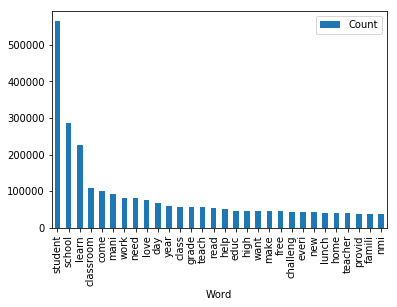

In [77]:
file = open('essay1pos.txt', encoding="utf8")
a2= file.read()
# Stopwords
stopwords2 = set(line.strip() for line in open('stopwords.txt'))
stopwords2 = stopwords2.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount2 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a2.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords2:
        if word not in wordcount2:
            wordcount2[word] = 1
        else:
            wordcount2[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for approved essay1 are as follows\n".format(n_print))
word_counter2 = collections.Counter(wordcount2)
for word, count in word_counter2.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst2 = word_counter2.most_common(n_print)
df = pd.DataFrame(lst2, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for unapproved essay1 are as follows

student :  98826
school :  48598
learn :  39112
classroom :  18643
come :  17450
mani :  15778
need :  14899
work :  14421
love :  12745
day :  11162
year :  10846
help :  10306
class :  10202
teach :  9674
grade :  9251
educ :  8941
want :  8810
make :  8359
high :  8164
read :  7766
challeng :  7521
free :  7462
teacher :  7457
new :  7452
experi :  7291
provid :  7213
home :  7092
famili :  7075
lunch :  6962
everi :  6917


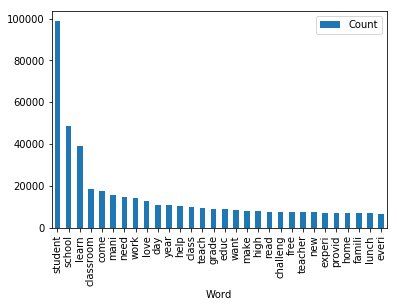

In [78]:
file = open('essay1neg.txt', encoding="utf8")
a3= file.read()
# Stopwords
stopwords3 = set(line.strip() for line in open('stopwords.txt'))
stopwords3 = stopwords3.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount3 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a3.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords3:
        if word not in wordcount3:
            wordcount3[word] = 1
        else:
            wordcount3[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for unapproved essay1 are as follows\n".format(n_print))
word_counter3 = collections.Counter(wordcount3)
for word, count in word_counter3.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst3 = word_counter3.most_common(n_print)
df = pd.DataFrame(lst3, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for approved essay2 are as follows

student :  633792
learn :  213013
use :  182548
help :  147135
classroom :  146987
read :  146331
need :  121687
book :  104905
work :  102677
abl :  88865
school :  86596
allow :  83729
would :  78133
skill :  72733
also :  69990
project :  69544
time :  68315
make :  66369
technolog :  63451
class :  63204
activ :  59190
this :  57104
provid :  55290
year :  54239
creat :  52905
mani :  51731
math :  50445
materi :  50359
way :  48849
day :  47921


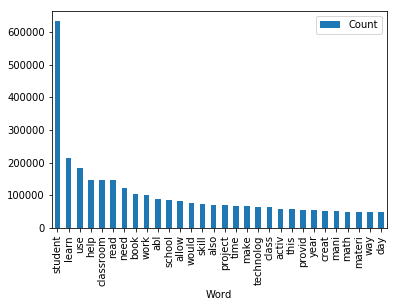

In [79]:
file = open('essay2pos.txt', encoding="utf8")
a4= file.read()
# Stopwords
stopwords4 = set(line.strip() for line in open('stopwords.txt'))
stopwords4 = stopwords4.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount4 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a4.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords4:
        if word not in wordcount4:
            wordcount4[word] = 1
        else:
            wordcount4[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for approved essay2 are as follows\n".format(n_print))
word_counter4 = collections.Counter(wordcount4)
for word, count in word_counter4.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst4 = word_counter4.most_common(n_print)
df = pd.DataFrame(lst4, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for unapproved essay2 are as follows

student :  103427
learn :  41288
help :  25626
use :  24587
classroom :  23400
need :  21149
read :  18511
school :  17517
work :  16946
materi :  15188
abl :  13700
skill :  13671
project :  12833
make :  12217
allow :  12147
activ :  10956
would :  10651
book :  10520
time :  10345
also :  10121
creat :  10070
technolog :  9579
year :  9578
class :  9439
this :  9257
provid :  9232
math :  9086
way :  8751
mani :  8712
want :  8603


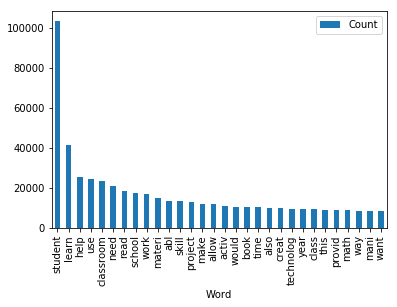

In [80]:
file = open('essay2neg.txt', encoding="utf8")
a5= file.read()
# Stopwords
stopwords5 = set(line.strip() for line in open('stopwords.txt'))
stopwords5 = stopwords5.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount5 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a5.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords5:
        if word not in wordcount5:
            wordcount5[word] = 1
        else:
            wordcount5[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for unapproved essay2 are as follows\n".format(n_print))
word_counter5 = collections.Counter(wordcount5)
for word, count in word_counter5.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst5 = word_counter5.most_common(n_print)
df = pd.DataFrame(lst5, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for approved summary are as follows

student :  171318
need :  165743
learn :  35008
book :  25908
classroom :  25697
read :  25356
help :  25054
use :  15577
seat :  12627
work :  11931
math :  11855
skill :  11633
activ :  11516
ipad :  11513
technolog :  10788
class :  9991
chromebook :  9663
chair :  9624
materi :  9538
set :  9071
suppli :  8640
school :  8542
engag :  8538
center :  7758
new :  7680
order :  7637
creat :  7495
ball :  7394
access :  7350
scienc :  7060


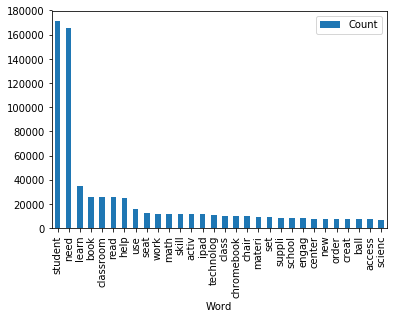

In [81]:
file = open('summarypos.txt', encoding="utf8")
a6= file.read()
# Stopwords
stopwords6 = set(line.strip() for line in open('stopwords.txt'))
stopwords6 = stopwords6.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount6 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a6.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords6:
        if word not in wordcount6:
            wordcount6[word] = 1
        else:
            wordcount6[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for approved summary are as follows\n".format(n_print))
word_counter6 = collections.Counter(wordcount6)
for word, count in word_counter6.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst6 = word_counter6.most_common(n_print)
df = pd.DataFrame(lst6, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for unapproved summary are as follows

student :  31330
need :  30476
learn :  7227
help :  5243
classroom :  4522
read :  3750
materi :  3659
suppli :  3614
book :  3383
activ :  2725
seat :  2719
math :  2665
use :  2528
skill :  2449
work :  2141
technolog :  2020
hand :  1903
school :  1885
creat :  1771
center :  1744
engag :  1727
scienc :  1718
art :  1546
class :  1505
ipad :  1456
item :  1447
game :  1409
project :  1393
order :  1387
flexibl :  1354


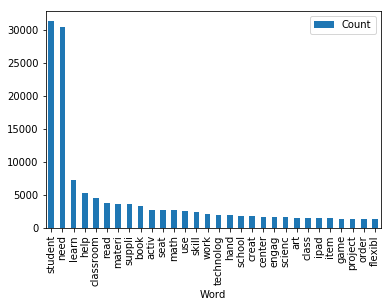

In [82]:
file = open('summaryneg.txt', encoding="utf8")
a7= file.read()
# Stopwords
stopwords7 = set(line.strip() for line in open('stopwords.txt'))
stopwords7 = stopwords7.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount7 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a7.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords7:
        if word not in wordcount7:
            wordcount7[word] = 1
        else:
            wordcount7[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for unapproved summary are as follows\n".format(n_print))
word_counter7 = collections.Counter(wordcount7)
for word, count in word_counter7.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst7 = word_counter7.most_common(n_print)
df = pd.DataFrame(lst7, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for approved description are as follows

set :  99139
pack :  66533
black :  57985
book :  56982
color :  53025
kid :  46736
blue :  38527
ipad :  32958
inch :  32243
mini :  26996
box :  26360
case :  25890
assort :  25214
ball :  25061
chair :  23375
appl :  23289
level :  22870
paper :  22515
read :  21327
white :  20918
green :  18795
grade :  18787
kit :  18469
red :  18433
gr :  18368
school :  17997
game :  17427
activ :  17232
oz :  16094
sheet :  15740


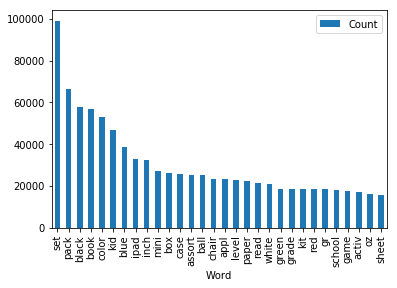

In [83]:
file = open('descriptionpos.txt', encoding="utf8")
a8= file.read()
# Stopwords
stopwords8 = set(line.strip() for line in open('stopwords.txt'))
stopwords8 = stopwords8.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they','x','gb']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount8 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a8.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords8:
        if word not in wordcount8:
            wordcount8[word] = 1
        else:
            wordcount8[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for approved description are as follows\n".format(n_print))
word_counter8 = collections.Counter(wordcount8)
for word, count in word_counter8.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst8 = word_counter8.most_common(n_print)
df = pd.DataFrame(lst8, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

The 30 most common words for unapproved description are as follows

set :  99139
pack :  66533
black :  57985
book :  56982
color :  53025
kid :  46736
blue :  38527
ipad :  32958
inch :  32243
mini :  26996
box :  26360
case :  25890
assort :  25214
ball :  25061
chair :  23375
appl :  23289
level :  22870
paper :  22515
read :  21327
white :  20918
green :  18795
grade :  18787
kit :  18469
red :  18433
gr :  18368
school :  17997
game :  17427
activ :  17232
oz :  16094
sheet :  15740


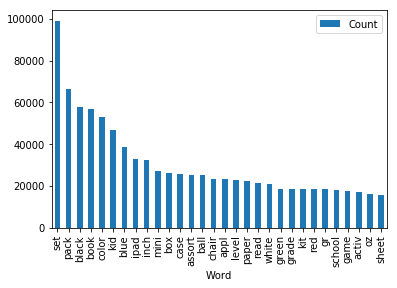

In [84]:
file = open('descriptionneg.txt', encoding="utf8")
a9= file.read()
# Stopwords
stopwords9 = set(line.strip() for line in open('stopwords.txt'))
stopwords9 = stopwords9.union(set(['mr','mrs','one','two','said','a','we','our','the','it','us','with','get','for','let','r','i','n','my','they','x','gb']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount9 = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a9.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords9:
        if word not in wordcount9:
            wordcount9[word] = 1
        else:
            wordcount9[word] += 1
# Print most common word
n_print = 30
print("The {} most common words for unapproved description are as follows\n".format(n_print))
word_counter9 = collections.Counter(wordcount8)
for word, count in word_counter9.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst9 = word_counter9.most_common(n_print)
df = pd.DataFrame(lst9, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [85]:
(lst)

[('learn', 17300),
 ('read', 10827),
 ('need', 9174),
 ('student', 8991),
 ('technolog', 8572),
 ('book', 8387),
 ('classroom', 8167),
 ('help', 6879),
 ('seat', 6651),
 ('chromebook', 4537),
 ('flexibl', 4424),
 ('math', 4384),
 ('make', 4153),
 ('move', 3776),
 ('ipad', 3743),
 ('through', 3668),
 ('suppli', 3606),
 ('grade', 3393),
 ('scienc', 3278),
 ('reader', 3209),
 ('wiggl', 3170),
 ('my', 3109),
 ('success', 3049),
 ('fun', 2959),
 ('art', 2922),
 ('learner', 2921),
 ('work', 2868),
 ('build', 2746),
 ('world', 2739),
 ('you', 2735)]

In [86]:
str_title_p=""
for i in lst:
    str_title_p+=i[0]+" "
str_title_p.strip()

'learn read need student technolog book classroom help seat chromebook flexibl math make move ipad through suppli grade scienc reader wiggl my success fun art learner work build world you'

In [87]:
str_title_n=""
for i in lst1:
    str_title_n+=i[0]+" "
str_title_n.strip()

'learn student read classroom need seat technolog help math suppli flexibl book make scienc art stem through fun grade move hand build mind center school success my play creat futur'

In [88]:
str_essay1_p=""
for i in lst2:
    str_essay1_p+=i[0]+" "
str_essay1_p.strip()

'student school learn classroom come mani work need love day year class grade teach read help educ high want make free challeng everi new lunch home teacher provid famili nmi'

In [89]:
str_essay1_n=""
for i in lst3:
    str_essay1_n+=i[0]+" "
str_essay1_n.strip()

'student school learn classroom come mani need work love day year help class teach grade educ want make high read challeng free teacher new experi provid home famili lunch everi'

In [90]:
str_essay2_p=""
for i in lst4:
    str_essay2_p+=i[0]+" "
str_essay2_p.strip()

'student learn use help classroom read need book work abl school allow would skill also project time make technolog class activ this provid year creat mani math materi way day'

In [91]:
str_essay2_n=""
for i in lst5:
    str_essay2_n+=i[0]+" "
str_essay2_n.strip()

'student learn help use classroom need read school work materi abl skill project make allow activ would book time also creat technolog year class this provid math way mani want'

In [92]:
str_summary_p=""
for i in lst6:
    str_summary_p+=i[0]+" "
str_summary_p.strip()

'student need learn book classroom read help use seat work math skill activ ipad technolog class chromebook chair materi set suppli school engag center new order creat ball access scienc'

In [93]:
str_summary_n=""
for i in lst7:
    str_summary_n+=i[0]+" "
str_summary_n.strip()

'student need learn help classroom read materi suppli book activ seat math use skill work technolog hand school creat center engag scienc art class ipad item game project order flexibl'

In [94]:
str_description_p=""
for i in lst8:
    str_description_p+=i[0]+" "
str_description_p.strip()

'set pack black book color kid blue ipad inch mini box case assort ball chair appl level paper read white green grade kit red gr school game activ oz sheet'

In [95]:
str_description_n=""
for i in lst9:
    str_description_n+=i[0]+" "
str_description_n.strip()

'set pack black book color kid blue ipad inch mini box case assort ball chair appl level paper read white green grade kit red gr school game activ oz sheet'

### Word cloud formation

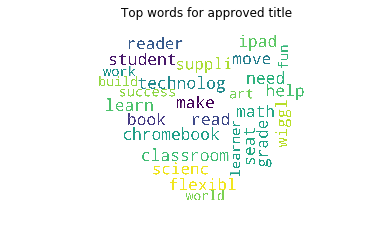

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

our_mask1 = np.array(Image.open('heart.png'))

cloud1 = WordCloud(background_color="white", mask = our_mask1).generate(str_title_p)

plt.imshow(cloud1)
plt.axis('off')
plt.title('Top words for approved title')
plt.show()

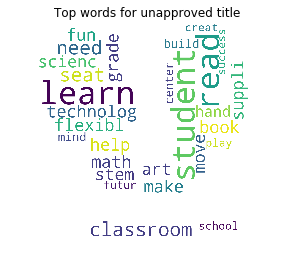

In [97]:
our_mask2 = np.array(Image.open('broken-heart.png'))
cloud2 = WordCloud(background_color="white", mask = our_mask2).generate(str_title_n)
plt.imshow(cloud2)
plt.axis('off')
plt.title('Top words for unapproved title')
plt.show()

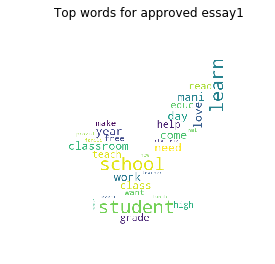

In [98]:
our_mask3 = np.array(Image.open('tick-mark.png'))
cloud3 = WordCloud(background_color="white", mask = our_mask3).generate(str_essay1_p)
plt.imshow(cloud3)
plt.axis('off')
plt.title('Top words for approved essay1')
plt.show()

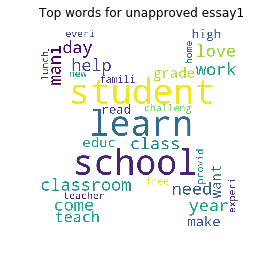

In [99]:
our_mask4 = np.array(Image.open('cross-mark.png'))
cloud4 = WordCloud(background_color="white", mask = our_mask4).generate(str_essay1_n)
plt.imshow(cloud4)
plt.axis('off')
plt.title('Top words for unapproved essay1')
plt.show()

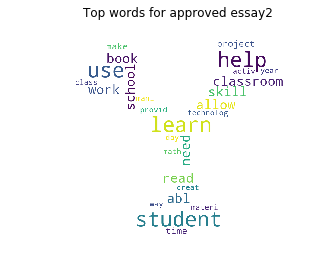

In [100]:
our_mask5 = np.array(Image.open('victory.png'))
cloud5 = WordCloud(background_color="white", mask = our_mask5).generate(str_essay2_p)
plt.imshow(cloud5)
plt.axis('off')
plt.title('Top words for approved essay2')
plt.show()

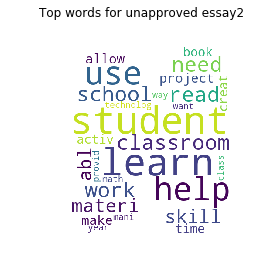

In [101]:
our_mask6 = np.array(Image.open('loss.png'))
cloud6 = WordCloud(background_color="white", mask = our_mask6).generate(str_essay2_n)
plt.imshow(cloud6)
plt.axis('off')
plt.title('Top words for unapproved essay2')
plt.show()

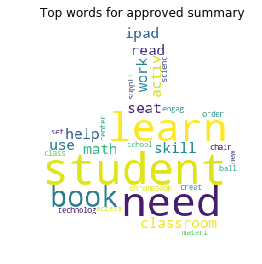

In [102]:
our_mask7 = np.array(Image.open('thumbs-up1.png'))
cloud7 = WordCloud(background_color="white", mask = our_mask7).generate(str_summary_p)
plt.imshow(cloud7)
plt.axis('off')
plt.title('Top words for approved summary')
plt.show()

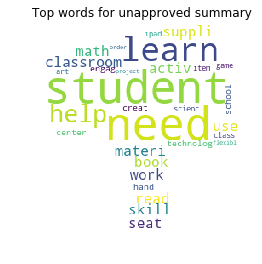

In [103]:
our_mask8 = np.array(Image.open('thumbs-down1.png'))
cloud8 = WordCloud(background_color="white", mask = our_mask8).generate(str_summary_n)
plt.imshow(cloud8)
plt.axis('off')
plt.title('Top words for unapproved summary')
plt.show()

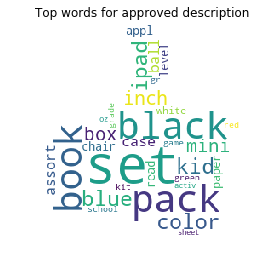

In [104]:
our_mask9 = np.array(Image.open('thumbs-up1.png'))
cloud9 = WordCloud(background_color="white", mask = our_mask9).generate(str_description_p)
plt.imshow(cloud9)
plt.axis('off')
plt.title('Top words for approved description')
plt.show()

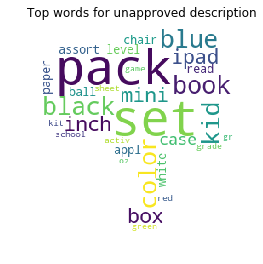

In [105]:
our_mask10 = np.array(Image.open('thumbs-down1.png'))
cloud10 = WordCloud(background_color="white", mask = our_mask10).generate(str_description_n)
plt.imshow(cloud10)
plt.axis('off')
plt.title('Top words for unapproved description')
plt.show()

# 10. Vectorising the texts using TfidfVectorizer

In [106]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def prep_text(text):
    q = "[\'\’\´\ʻ]"
    text = text.strip().lower()
    text = re.sub('\W+',' ', text)
    text = re.sub(r'(\")', ' ', text)
    text = re.sub(r"\\r|\\n", " ", text)
    text = re.sub(re.compile("won%st" % q), "will not", text)
    text = re.sub(re.compile("can%st" % q), "can not", text)
    text = re.sub(re.compile("n%st" % q), " not", text)
    text = re.sub(re.compile("%sre" % q), " are", text)
    text = re.sub(re.compile("%ss" % q), " is", text)
    text = re.sub(re.compile("%sd" % q), " would", text)
    text = re.sub(re.compile("%sll" % q), " will", text)
    text = re.sub(re.compile("%st" % q), " not", text)
    text = re.sub(re.compile("%sve" % q), " have", text)
    text = re.sub(re.compile("%sm" % q), " am", text)
    text = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return text


In [107]:
# col_names = ['project_essay_1', 'project_essay_2', 'project_resource_summary', 'resource_description', 'project_title']
for k in textColumns:
    print('processing column:   '+ k)
    train_data[k+'_new'] = train_data[k].apply(lambda x: prep_text(x))

processing column:   project_essay_1
processing column:   project_essay_2
processing column:   project_resource_summary
processing column:   resource_description
processing column:   project_title


In [108]:
#train_data.drop('project_essay_1',axis=1)

In [109]:
# # train_data=train_data.drop('project_essay_1',axis=1)
# train_data=train_data.drop('project_essay_2',axis=1)
# train_data=train_data.drop('project_resource_summary',axis=1)
# train_data=train_data.drop('resource_description',axis=1)
# train_data=train_data.drop('project_title',axis=1)


In [110]:
train_data.shape

(182080, 61)

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(norm='l2', min_df=0,  max_features=8000, 
            strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
            ngram_range=(1,2), use_idf=True, smooth_idf=False, sublinear_tf=True,
            stop_words = 'english')

In [112]:
x1 = train_data['project_title_new'].apply(lambda x: ' '.join(x))
x1.values

array(['super sight word center', 'keep calm and dance on',
       'let 3doodle to learn', ..., 'sustainable classroom',
       'can i go to the library', 'reader leader'], dtype=object)

In [113]:
tfv.fit(list(x1.values))
x1_tfv = tfv.transform(x1)


In [114]:
x2 = train_data['project_essay_1_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(x2.values))
x2_tfv = tfv.transform(x2)

In [115]:
x3 = train_data['project_essay_2_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(x3.values))
x3_tfv = tfv.transform(x3)

In [116]:
x4 = train_data['project_resource_summary_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(x4.values))
x4_tfv = tfv.transform(x4)

In [117]:
x5 = train_data['resource_description_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(x5.values))
x5_tfv = tfv.transform(x5)

In [118]:
X = hstack((x1_tfv,x2_tfv,x3_tfv,x4_tfv,x5_tfv))

In [119]:
lables = train_data['project_is_approved']

In [120]:
train_data = train_data.drop('project_is_approved',axis=1)

In [121]:
train_data = train_data.drop('project_title_new',axis=1)

In [122]:
train_data = train_data.drop('project_essay_1_new',axis=1)

In [123]:
train_data = train_data.drop('project_essay_2_new',axis=1)

In [124]:
train_data = train_data.drop('project_resource_summary_new',axis=1)

In [125]:
train_data = train_data.drop('resource_description_new',axis=1)

In [126]:
feat_train = train_data

In [127]:
# from scipy.sparse import csr_matrix
# feat_train = csr_matrix(feat_train.values)
feat_train.head()
type(feat_train)

pandas.core.frame.DataFrame

In [128]:
feat_train.to_csv('final_file.csv', encoding='utf-8', index=False)

In [129]:
numFeatures.remove('minPriceAll')

In [130]:
numFeatures.remove('maxPriceAll')

In [131]:
numFeatures.remove('meanPriceAll')

In [132]:
from sklearn.preprocessing import StandardScaler
ready = hstack((X, StandardScaler().fit_transform(train_data[numFeatures].fillna(0)))).tocsr()

In [133]:
ready.shape
#ready.drop

(182080, 40035)

# 11. Model Creation

In [134]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RepeatedKFold

In [135]:
seed = 28
K = 5 # How many folds do you want? 
kf = KFold(n_splits = K, random_state = seed, shuffle = True)


# 12. Preparing the test data similarly

### Imputing the missing data

In [136]:
test_data.loc[test_data.project_essay_4.isnull(),['project_essay_4','project_essay_2']] = test_data.loc[test_data.project_essay_4.isnull(),['project_essay_2','project_essay_4']].values

test_data[['project_essay_2', 'project_essay_3']] = test_data[['project_essay_2', 'project_essay_3']].fillna('')
test_data['project_essay_1'] = test_data.apply(lambda row: ' '.join([str(row['project_essay_1']), 
                                                     str(row['project_essay_2'])]), axis=1)
test_data['project_essay_2'] = test_data.apply(lambda row: ' '.join([str(row['project_essay_3']), 
                                                     str(row['project_essay_4'])]), axis=1)
test_data = test_data.drop(['project_essay_3', 'project_essay_4'], axis=1)


test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_resource_summary,teacher_number_of_previously_posted_projects
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,My second grade class will really benefit from...,My students need a drying rack for their art p...,2
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,"We do a lot of small group, where the student ...",My students need Time Magazines for next year ...,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,These Fairy Tale Problem Solving STEM kits wil...,My students need to be mentally stimulated to ...,0
3,p233680,8e92622d2985d3faac1de71609c4be72,Mrs.,IA,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,Book bins will help to organize our classroom ...,My students need an organized classroom library.,0
4,p171879,91a3c89981f626d9a0d067c65fb186ce,Mr.,CA,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",Each day in my class students consume supplies...,My students need reeds to perform in class eac...,1


In [137]:
list(test_data)

['id',
 'teacher_id',
 'teacher_prefix',
 'school_state',
 'project_submitted_datetime',
 'project_grade_category',
 'project_subject_categories',
 'project_subject_subcategories',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_resource_summary',
 'teacher_number_of_previously_posted_projects']

### Analyzing the price

In [138]:
resource['total_price'] = resource['quantity']*resource['price']
resource.head()

,id,description,quantity,price,total_price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95,44.85
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59,27.18
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95,74.85


In [139]:
new_test_resource = resource.groupby('id').agg({'description':'count',
                            'quantity':'sum',
                            'price':'sum',
                            'total_price':'sum'}).rename(columns={'description':'total_items'})
new_test_resource['avg_price'] = new_test_resource['total_price'] / new_test_resource['quantity']
new_test_resource.head()

,total_items,quantity,price,total_price,avg_price
id,,,,,
p000001,4,7,459.56,833.63,119.090000
p000002,14,21,515.89,630.28,30.013333
p000003,4,4,298.97,298.97,74.742500
p000004,95,98,1113.69,1126.22,11.492041
p000005,4,8,485.99,702.31,87.788750


In [140]:
numTestFeatures = ['total_items', 'quantity', 'price', 'total_price', 'avg_price']

for func in ['min', 'max', 'mean']:
    new_test_resource = new_test_resource.join(resource.groupby('id').agg({'quantity':func,
                                          'price':func,
                                          'total_price':func}).rename(
                                columns={'quantity':func+'Quantity',
                                         'price':func+'Price',
                                         'total_price':func+'total_price'}).fillna(0))
    numTestFeatures += [func+'Quantity', func+'Price', func+'PriceAll']

new_test_resource = new_test_resource.join(resource.groupby('id').agg({'description':lambda x:' '.join(x.values.astype(str))}).rename(
    columns={'description':'resource_description'}))

test_data = test_data.join(new_test_resource, on='id')
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,minQuantity,minPrice,mintotal_price,maxQuantity,maxPrice,maxtotal_price,meanQuantity,meanPrice,meantotal_price,resource_description
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,1,149.00,149.00,1,149.00,149.00,1.000000,149.000000,149.000000,LC652 - Lakeshore Double-Space Mobile Drying Rack
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,2,5.01,18.04,40,9.95,200.40,14.666667,7.993333,79.446667,"Brewster WPD90218 Wall Pops Flirt Dot, Set of ..."
2,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,2,149.00,298.00,2,149.00,298.00,2.000000,149.000000,298.000000,PP440X - Fairy Tales Problem Solving STEM Kits
3,p233680,8e92622d2985d3faac1de71609c4be72,Mrs.,IA,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,1,4.99,17.98,5,149.00,149.00,3.181818,19.536364,31.878182,AA758BU - Connect & Store Book Bin - Blue AA75...
4,p171879,91a3c89981f626d9a0d067c65fb186ce,Mr.,CA,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,2,35.29,105.87,3,70.39,146.97,2.666667,51.556667,131.206667,"Alto Saxophone Reeds, Box of 25 Bb Clarinet Re..."


### Sentiment Analysis

In [141]:
textTestColumns = ['project_essay_1', 'project_essay_2', 'project_resource_summary', 'resource_description', 'project_title']
def getSentFeat(s):
    sent = TextBlob(s).sentiment
    return (sent.polarity, sent.subjectivity)

print('sentimental analysis')
with Pool(4) as p:
    for col in textTestColumns:
        temp = pl.array(list(p.map(getSentFeat, test_data[col])))
        test_data[col+'_pol'] = temp[:,0]
        test_data[col+'_sub'] = temp[:,1]
        numTestFeatures += [col+'_pol', col+'_sub']

sentimental analysis


In [142]:
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_pol,project_essay_1_sub,project_essay_2_pol,project_essay_2_sub,project_resource_summary_pol,project_resource_summary_sub,resource_description_pol,resource_description_sub,project_title_pol,project_title_sub
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,0.341922,0.634694,0.175000,0.212500,0.000000,0.000000,0.000000,0.0,1.0,1.0
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,0.118884,0.488214,0.252431,0.611654,-0.105556,0.333333,0.000000,0.0,0.0,0.0
2,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,0.360119,0.450000,0.291667,0.395833,-0.100000,0.200000,0.000000,0.0,0.0,0.0
3,p233680,8e92622d2985d3faac1de71609c4be72,Mrs.,IA,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,0.273295,0.485985,0.221667,0.555556,0.000000,0.000000,-0.033333,0.1,0.0,0.0
4,p171879,91a3c89981f626d9a0d067c65fb186ce,Mr.,CA,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,0.190909,0.429545,0.034412,0.628333,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [143]:
import re

print('common words')
for i, col1 in enumerate(textTestColumns[:-1]):
    for col2 in textTestColumns[i+1:]:
        test_data['%s_%s_common' % (col1, col2)] = test_data.apply(lambda row:len(set(re.split('\W', row[col1])).intersection(re.split('\W', row[col2]))), axis=1)
        numTestFeatures.append('%s_%s_common' % (col1, col2))

common words


In [144]:
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,21,8,1,1,8,1,1,1,1,1
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,38,7,4,2,10,5,3,1,0,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,21,6,1,1,8,5,3,1,1,2
3,p233680,8e92622d2985d3faac1de71609c4be72,Mrs.,IA,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,17,4,1,0,5,2,0,1,0,1
4,p171879,91a3c89981f626d9a0d067c65fb186ce,Mr.,CA,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,27,6,3,2,9,2,2,1,0,1


### Converting categorical variables to numerical

In [145]:
test_data["teacher_prefix"].value_counts()

Mrs.       40982
Ms.        27585
Mr.         7795
Teacher     1657
Dr.           15
Name: teacher_prefix, dtype: int64

In [146]:
cleanup_test_prefix = {}
for i,name in enumerate(test_data['teacher_prefix'].unique()):
    cleanup_test_prefix[name] = i+1
    
cleanup_test_prefix

{'Ms.': 1, 'Mrs.': 2, 'Mr.': 3, 'Teacher': 4, nan: 5, 'Dr.': 6}

In [147]:
imputed_test_prefix = {"teacher_prefix":    cleanup_test_prefix}
test_data.replace(imputed_test_prefix, inplace=True)
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p233245,5724a0c3ce11008366fff36dab4b943c,1,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,21,8,1,1,8,1,1,1,1,1
1,p096795,445619941dc7cbe81c7be109dc61a56a,2,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,38,7,4,2,10,5,3,1,0,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,2,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,21,6,1,1,8,5,3,1,1,2
3,p233680,8e92622d2985d3faac1de71609c4be72,2,IA,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,17,4,1,0,5,2,0,1,0,1
4,p171879,91a3c89981f626d9a0d067c65fb186ce,3,CA,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,27,6,3,2,9,2,2,1,0,1


In [148]:
numTestFeatures.append('teacher_prefix')

In [149]:
#train_data['school_state'].value_counts()
test_data['school_state'].unique()
#school_state = get_categorical_features(train_data, 'school_state', Encoder)

array(['CA', 'SC', 'IA', 'CO', 'GA', 'NV', 'AL', 'MN', 'CT', 'MD', 'IN',
       'AR', 'TX', 'NE', 'FL', 'AZ', 'WA', 'NM', 'MO', 'IL', 'MI', 'NJ',
       'HI', 'KY', 'ID', 'KS', 'VA', 'NC', 'RI', 'LA', 'WV', 'UT', 'MA',
       'NY', 'TN', 'MS', 'OH', 'OK', 'DE', 'PA', 'ME', 'OR', 'AK', 'ND',
       'WI', 'DC', 'SD', 'NH', 'VT', 'MT', 'WY'], dtype=object)

In [150]:
cleanup_test_state = {}
for i,name in enumerate(test_data['school_state'].unique()):
    cleanup_test_state[name] = i+1
    
cleanup_test_state

{'AK': 43,
 'AL': 7,
 'AR': 12,
 'AZ': 16,
 'CA': 1,
 'CO': 4,
 'CT': 9,
 'DC': 46,
 'DE': 39,
 'FL': 15,
 'GA': 5,
 'HI': 23,
 'IA': 3,
 'ID': 25,
 'IL': 20,
 'IN': 11,
 'KS': 26,
 'KY': 24,
 'LA': 30,
 'MA': 33,
 'MD': 10,
 'ME': 41,
 'MI': 21,
 'MN': 8,
 'MO': 19,
 'MS': 36,
 'MT': 50,
 'NC': 28,
 'ND': 44,
 'NE': 14,
 'NH': 48,
 'NJ': 22,
 'NM': 18,
 'NV': 6,
 'NY': 34,
 'OH': 37,
 'OK': 38,
 'OR': 42,
 'PA': 40,
 'RI': 29,
 'SC': 2,
 'SD': 47,
 'TN': 35,
 'TX': 13,
 'UT': 32,
 'VA': 27,
 'VT': 49,
 'WA': 17,
 'WI': 45,
 'WV': 31,
 'WY': 51}

In [151]:
imputed_test_state = {"school_state":    cleanup_test_state}
test_data.replace(imputed_test_state, inplace=True)
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p233245,5724a0c3ce11008366fff36dab4b943c,1,1,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,21,8,1,1,8,1,1,1,1,1
1,p096795,445619941dc7cbe81c7be109dc61a56a,2,2,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,38,7,4,2,10,5,3,1,0,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,2,2,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,21,6,1,1,8,5,3,1,1,2
3,p233680,8e92622d2985d3faac1de71609c4be72,2,3,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,17,4,1,0,5,2,0,1,0,1
4,p171879,91a3c89981f626d9a0d067c65fb186ce,3,1,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,27,6,3,2,9,2,2,1,0,1


In [152]:
#numFeatures
numTestFeatures.append('school_state')

In [153]:
#train_data['project_grade_category'].unique()
cleanup_test_grade = {}
for i,name in enumerate(test_data['project_grade_category'].unique()):
    cleanup_test_grade[name] = i+1

cleanup_test_grade

{'Grades 3-5': 2, 'Grades 6-8': 3, 'Grades 9-12': 4, 'Grades PreK-2': 1}

In [154]:
imputed_test_grade = {"project_grade_category":    cleanup_test_grade}
test_data.replace(imputed_test_grade, inplace=True)
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p233245,5724a0c3ce11008366fff36dab4b943c,1,1,2016-04-27 13:45:41,1,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,21,8,1,1,8,1,1,1,1,1
1,p096795,445619941dc7cbe81c7be109dc61a56a,2,2,2016-04-28 12:43:56,2,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,38,7,4,2,10,5,3,1,0,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,2,2,2016-04-29 21:16:05,1,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,21,6,1,1,8,5,3,1,1,2
3,p233680,8e92622d2985d3faac1de71609c4be72,2,3,2016-04-27 22:32:43,1,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,17,4,1,0,5,2,0,1,0,1
4,p171879,91a3c89981f626d9a0d067c65fb186ce,3,1,2016-04-27 18:59:15,3,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,27,6,3,2,9,2,2,1,0,1


In [155]:
numTestFeatures.append('project_grade_category')

In [156]:
cleanup_test_sub_cat = {}
for i,name in enumerate(test_data['project_subject_categories'].unique()):
    cleanup_test_sub_cat[name] = i+1
    
imputed_test_sub_cat = {"project_subject_categories": cleanup_test_sub_cat}
test_data.replace(imputed_test_sub_cat, inplace=True)
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p233245,5724a0c3ce11008366fff36dab4b943c,1,1,2016-04-27 13:45:41,1,1,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,21,8,1,1,8,1,1,1,1,1
1,p096795,445619941dc7cbe81c7be109dc61a56a,2,2,2016-04-28 12:43:56,2,2,"Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,38,7,4,2,10,5,3,1,0,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,2,2,2016-04-29 21:16:05,1,3,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,21,6,1,1,8,5,3,1,1,2
3,p233680,8e92622d2985d3faac1de71609c4be72,2,3,2016-04-27 22:32:43,1,4,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,17,4,1,0,5,2,0,1,0,1
4,p171879,91a3c89981f626d9a0d067c65fb186ce,3,1,2016-04-27 18:59:15,3,5,"Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,27,6,3,2,9,2,2,1,0,1


In [157]:
test_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_1_project_essay_2_common,project_essay_1_project_resource_summary_common,project_essay_1_resource_description_common,project_essay_1_project_title_common,project_essay_2_project_resource_summary_common,project_essay_2_resource_description_common,project_essay_2_project_title_common,project_resource_summary_resource_description_common,project_resource_summary_project_title_common,resource_description_project_title_common
0,p233245,5724a0c3ce11008366fff36dab4b943c,1,1,2016-04-27 13:45:41,1,1,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,...,21,8,1,1,8,1,1,1,1,1
1,p096795,445619941dc7cbe81c7be109dc61a56a,2,2,2016-04-28 12:43:56,2,2,"Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,...,38,7,4,2,10,5,3,1,0,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,2,2,2016-04-29 21:16:05,1,3,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,...,21,6,1,1,8,5,3,1,1,2
3,p233680,8e92622d2985d3faac1de71609c4be72,2,3,2016-04-27 22:32:43,1,4,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,...,17,4,1,0,5,2,0,1,0,1
4,p171879,91a3c89981f626d9a0d067c65fb186ce,3,1,2016-04-27 18:59:15,3,5,"Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",...,27,6,3,2,9,2,2,1,0,1


In [158]:
numTestFeatures.append('project_subject_categories')

In [159]:
# col_names = ['project_essay_1', 'project_essay_2', 'project_resource_summary', 'resource_description', 'project_title']
for k in textTestColumns:
    print('processing column:   '+ k)
    test_data[k+'_new'] = test_data[k].apply(lambda x: prep_text(x))

processing column:   project_essay_1
processing column:   project_essay_2
processing column:   project_resource_summary
processing column:   resource_description
processing column:   project_title


In [160]:
#test_data.drop('project_essay_1',axis=1)

In [161]:
# train_data=train_data.drop('project_essay_1',axis=1)
# test_data=test_data.drop('project_essay_2',axis=1)
# test_data=test_data.drop('project_resource_summary',axis=1)
# test_data=test_data.drop('resource_description',axis=1)
# test_data=test_data.drop('project_title',axis=1)


In [162]:
test_data.shape

(78035, 53)

### Vectorising the texts

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(norm='l2', min_df=0,  max_features=8000, 
            strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
            ngram_range=(1,2), use_idf=True, smooth_idf=False, sublinear_tf=True,
            stop_words = 'english')

In [164]:
testx1 = test_data['project_title_new'].apply(lambda x: ' '.join(x))
testx1.values

array(['art will make you happy', 'keeping up with the time',
       'building bridge to problem solving', ...,
       'everyday author among u', 'coat locker for our classroom',
       'a coffee shop classroom'], dtype=object)

In [165]:
tfv.fit(list(testx1.values))
x1_test_tfv = tfv.transform(testx1)

In [166]:
testx2 = test_data['project_essay_1_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(testx2.values))
x2_test_tfv = tfv.transform(testx2)

In [167]:
testx3 = test_data['project_essay_2_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(testx3.values))
x3_test_tfv = tfv.transform(testx3)

In [168]:
testx4 = test_data['project_resource_summary_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(testx4.values))
x4_test_tfv = tfv.transform(testx4)

In [169]:
testx5 = test_data['resource_description_new'].apply(lambda x: ' '.join(x))

tfv.fit(list(testx5.values))
x5_test_tfv = tfv.transform(testx5)

In [170]:
X_test = hstack((x1_test_tfv,x2_test_tfv,x3_test_tfv,x4_test_tfv,x5_test_tfv))

In [171]:
#lables_test = test_data['project_is_approved']

In [172]:
test_data = test_data.drop('project_title_new',axis=1)

In [173]:
test_data = test_data.drop('project_essay_1_new',axis=1)

In [174]:
test_data = test_data.drop('project_essay_2_new',axis=1)

In [175]:
test_data = test_data.drop('project_resource_summary_new',axis=1)

In [176]:
test_data = test_data.drop('resource_description_new',axis=1)

In [177]:
feat_test = test_data

In [178]:
feat_test.head()
type(feat_test)

pandas.core.frame.DataFrame

In [179]:
feat_test.to_csv('final_test_file.csv', encoding='utf-8', index=False)

In [180]:
numTestFeatures.remove('minPriceAll')

In [181]:
numTestFeatures.remove('maxPriceAll')

In [182]:
numTestFeatures.remove('meanPriceAll')

In [183]:
from sklearn.preprocessing import StandardScaler
test_ready = hstack((X_test, StandardScaler().fit_transform(test_data[numFeatures].fillna(0)))).tocsr()

In [184]:
test_ready.shape

(78035, 40035)

# 13. Fitting into the model and getting predictions

In [185]:
import random

cv_scores = []
xgb_preds = []

for train_index, test_index in kf.split(ready):
    
    # Split out a validation set
    X_train, X_valid, y_train, y_valid = train_test_split(ready, lables, test_size=0.20, random_state=random.seed(seed))
    
    # params are tuned with kaggle kernels in mind
    xgb_params = {'eta': 0.15, 
                  'max_depth': 7, 
                  'subsample': 0.80, 
                  'colsample_bytree': 0.80, 
                  'objective': 'binary:logistic', 
                  'eval_metric': 'auc', 
                  'seed': seed
                 }
    
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test_ready)
    
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    model = xgb.train(xgb_params, d_train, 2000, watchlist, verbose_eval=50, early_stopping_rounds=40)
    cv_scores.append(float(model.attributes()['best_score']))
    xgb_pred = model.predict(d_test)
    xgb_preds.append(list(xgb_pred))

[0]	train-auc:0.714449	valid-auc:0.706148
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 40 rounds.
[50]	train-auc:0.848442	valid-auc:0.77851
[100]	train-auc:0.884026	valid-auc:0.787132
[150]	train-auc:0.906465	valid-auc:0.79049
[200]	train-auc:0.922607	valid-auc:0.790104
[250]	train-auc:0.936037	valid-auc:0.790314
Stopping. Best iteration:
[226]	train-auc:0.929926	valid-auc:0.790844

[0]	train-auc:0.713985	valid-auc:0.703418
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 40 rounds.
[50]	train-auc:0.848241	valid-auc:0.772751
[100]	train-auc:0.882937	valid-auc:0.782401
[150]	train-auc:0.90445	valid-auc:0.784776
[200]	train-auc:0.920388	valid-auc:0.78539
Stopping. Best iteration:
[194]	train-auc:0.918201	valid-auc:0.785936

[0]	train-auc:0.71442	valid-auc:0.699941
Multiple eval metrics have been passed: 'valid-auc' will 

In [186]:
print(cv_scores)
print(np.mean(cv_scores))

[0.790844, 0.785936, 0.782785, 0.789208, 0.784259]
0.7866064


In [187]:
x_preds=[]
for i in range(len(xgb_preds[0])):
    sum=0
    for j in range(K):
        sum+=xgb_preds[j][i]
    x_preds.append(sum / K)


In [188]:
x_preds[0:10]

[0.89372097253799443,
 0.87408215999603267,
 0.96398024559021001,
 0.67265316247940066,
 0.81943552494049077,
 0.74867333173751827,
 0.93486392498016357,
 0.89498965740203862,
 0.65883702039718628,
 0.93850765228271482]

In [190]:
len(x_preds)

78035

In [192]:
import csv
csv.field_size_limit()

131072

In [193]:
submitted_id = test_data['id']
len(submitted_id)

78035

In [194]:
x_preds = pd.DataFrame(x_preds)
x_preds.columns = ['project_is_approved']

#submid = sub['id']
xsub = pd.concat([submitted_id, x_preds], axis=1)
x_preds.to_csv('final_xgb_submission.csv', index=False)